In [1]:
import pandas as pd
import wget
import numpy as np
import altair as alt
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
urls =  ['https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv','https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv']
[wget.download(url) for url in urls]

['time_series_covid19_confirmed_US (6).csv',
 'time_series_covid19_deaths_US (6).csv']

In [3]:
DataC = pd.read_csv('time_series_covid19_confirmed_US.csv')
DataD = pd.read_csv('time_series_covid19_deaths_US.csv')

In [4]:
DataC.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,2597,2617,2634,2661,2686,2704,2716,2735,2751,2780
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,8131,8199,8269,8376,8473,8576,8603,8733,8820,8890
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,1157,1160,1161,1167,1170,1170,1171,1173,1175,1178
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,1036,1136,1142,1157,1162,1170,1173,1179,1188,1196
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,2735,2754,2763,2822,2855,2879,2888,2922,2946,2997


In [5]:
DataD.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,39,39,39,39,41,42,42,42,42,42
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,84,84,84,84,98,98,98,98,98,98
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,10,10,10,10,10,10,10,10,11,11
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,17,17,17,17,17,17,17,17,17,17
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,36,36,36,36,39,40,40,40,40,40


In [6]:
DataC.columns[11:]

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '11/21/20', '11/22/20', '11/23/20', '11/24/20', '11/25/20', '11/26/20',
       '11/27/20', '11/28/20', '11/29/20', '11/30/20'],
      dtype='object', length=314)

In [7]:
dates = DataC.columns[11:]

DataC_long = DataC.melt(
    id_vars = ['Province_State', 'Admin2'],
    value_vars = dates,
    var_name = 'Date',
    value_name = 'Confirmed'
)



DataD_long = DataD.melt(
    id_vars = ['Province_State', 'Admin2'],
    value_vars = dates,
    var_name = 'Date',
    value_name = 'Deaths'
)



In [8]:
DataC_long.info()
DataC_long

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048760 entries, 0 to 1048759
Data columns (total 4 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   Province_State  1048760 non-null  object
 1   Admin2          1046876 non-null  object
 2   Date            1048760 non-null  object
 3   Confirmed       1048760 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 32.0+ MB


,Province_State,Admin2,Date,Confirmed
0,Alabama,Autauga,1/22/20,0
1,Alabama,Baldwin,1/22/20,0
2,Alabama,Barbour,1/22/20,0
3,Alabama,Bibb,1/22/20,0
4,Alabama,Blount,1/22/20,0
...,...,...,...,...
1048755,Wyoming,Teton,11/30/20,1644
1048756,Wyoming,Uinta,11/30/20,1070
1048757,Wyoming,Unassigned,11/30/20,0
1048758,Wyoming,Washakie,11/30/20,441


In [9]:
DataD_long

,Province_State,Admin2,Date,Deaths
0,Alabama,Autauga,1/22/20,0
1,Alabama,Baldwin,1/22/20,0
2,Alabama,Barbour,1/22/20,0
3,Alabama,Bibb,1/22/20,0
4,Alabama,Blount,1/22/20,0
...,...,...,...,...
1048755,Wyoming,Teton,11/30/20,2
1048756,Wyoming,Uinta,11/30/20,4
1048757,Wyoming,Unassigned,11/30/20,0
1048758,Wyoming,Washakie,11/30/20,8


In [10]:
full_table = DataC_long.merge(
  right=DataD_long, 
  how='left',
  on=['Province_State', 'Admin2','Date']
)

In [11]:
full_table
full_table['Date'] = pd.to_datetime(full_table['Date'])

In [12]:
full_grouped = full_table.groupby([ 'Province_State','Date'])[['Confirmed', 'Deaths']].sum().reset_index()


In [13]:
full_grouped.isna().sum
full_grouped.Province_State.unique()

temp = full_grouped.groupby(['Province_State', 'Date', ])['Confirmed', 'Deaths']
temp = temp.sum().diff().reset_index()
mask = temp['Province_State'] != temp['Province_State'].shift(1)
temp.loc[mask, 'Confirmed'] = np.nan
temp.loc[mask, 'Deaths'] = np.nan

# renaming columns
temp.columns = ['Province_State', 'Date', 'New_cases', 'New_deaths']

# merging new values
full_grouped = pd.merge(full_grouped, temp, on=['Province_State', 'Date'])

# filling na with 0
full_grouped = full_grouped.fillna(0)

# fixing data types
cols = ['New_cases', 'New_deaths']
full_grouped[cols] = full_grouped[cols].astype('int')

# 
full_grouped['New_cases'] = full_grouped['New_cases'].apply(lambda x: 0 if x<0 else x)

<ipython-input-13-0358089a24a6>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  temp = full_grouped.groupby(['Province_State', 'Date', ])['Confirmed', 'Deaths']


In [14]:
full_grouped

,Province_State,Date,Confirmed,Deaths,New_cases,New_deaths
0,Alabama,2020-01-22,0,0,0,0
1,Alabama,2020-01-23,0,0,0,0
2,Alabama,2020-01-24,0,0,0,0
3,Alabama,2020-01-25,0,0,0,0
4,Alabama,2020-01-26,0,0,0,0
...,...,...,...,...,...,...
18207,Wyoming,2020-11-26,30761,215,0,0
18208,Wyoming,2020-11-27,31773,215,1012,0
18209,Wyoming,2020-11-28,31928,215,155,0
18210,Wyoming,2020-11-29,32489,215,561,0


In [15]:
full_grouped.Province_State.unique()

array(['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'Diamond Princess', 'District of Columbia', 'Florida', 'Georgia',
       'Grand Princess', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Northern Mariana Islands', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virgin Islands', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [16]:
Ill = full_grouped[full_grouped['Province_State'] == 'North Carolina']

base = alt.Chart(Ill).mark_bar().encode(
    x='monthdate(Date):O',
).properties(
    width=500
)

red = alt.value("#f54242")

base.encode(y = 'Confirmed').properties(title = 'Total Confirmed') | base.encode(y = 'Deaths', color = red).properties(title = 'Total Deaths Florida')


alt.HConcatChart(...)

In [17]:
Ill = Ill.reset_index()
Ill['Days'] = Ill.index



In [18]:
Ill

,index,Province_State,Date,Confirmed,Deaths,New_cases,New_deaths,Days
0,11618,North Carolina,2020-01-22,0,0,0,0,0
1,11619,North Carolina,2020-01-23,0,0,0,0,1
2,11620,North Carolina,2020-01-24,0,0,0,0,2
3,11621,North Carolina,2020-01-25,0,0,0,0,3
4,11622,North Carolina,2020-01-26,0,0,0,0,4
...,...,...,...,...,...,...,...,...
309,11927,North Carolina,2020-11-26,346506,5138,0,0,309
310,11928,North Carolina,2020-11-27,354514,5210,8008,72,310
311,11929,North Carolina,2020-11-28,357958,5219,3444,9,311
312,11930,North Carolina,2020-11-29,361778,5240,3820,21,312


In [19]:

# X = Ill['Days'].values.reshape(-1,1)
# y = Ill['Confirmed'].values.reshape(-1,1)


# reg = LinearRegression()
# reg.fit(X, y)
# p = reg.predict(X)
# plt.figure(figsize=(16, 8))
# plt.scatter(
#     X,
#     y,
#     c='red'
# )
# plt.plot(
#     X,
#     p,
#     c='blue',
#     linewidth=1
# )


# # plt.xticks(np.arange(Ill.shape[0])[::20], Ill.Date[1::20], rotation=35)
# #plt.set_xticklabels(Ill.date)

# plt.xlabel("Days")
# plt.ylabel("Confirmed")
# plt.show()

In [20]:
red = alt.value("#f54242")
base.encode(y = 'New_cases').properties(title = 'Daily New Cases Florida' ) | base.encode(y = 'New_deaths', color = red).properties(title = 'Daily New Virginia')

alt.HConcatChart(...)

In [21]:
full = full_grouped.groupby([ 'Province_State','Date'])[['New_cases','New_deaths']].sum().reset_index()



In [22]:
full

,Province_State,Date,New_cases,New_deaths
0,Alabama,2020-01-22,0,0
1,Alabama,2020-01-23,0,0
2,Alabama,2020-01-24,0,0
3,Alabama,2020-01-25,0,0
4,Alabama,2020-01-26,0,0
...,...,...,...,...
18207,Wyoming,2020-11-26,0,0
18208,Wyoming,2020-11-27,1012,0
18209,Wyoming,2020-11-28,155,0
18210,Wyoming,2020-11-29,561,0


In [23]:
print(full_grouped.Province_State.unique())

States = ['New York' ,'California', 'Illinois' , 'Florida', 'Texas','Washington', 'Maryland','New Jersey' ]
selected_States = full_grouped[full_grouped['Province_State'].isin(States)]

['Alabama' 'Alaska' 'American Samoa' 'Arizona' 'Arkansas' 'California'
 'Colorado' 'Connecticut' 'Delaware' 'Diamond Princess'
 'District of Columbia' 'Florida' 'Georgia' 'Grand Princess' 'Guam'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Northern Mariana Islands' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Puerto Rico' 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee'
 'Texas' 'Utah' 'Vermont' 'Virgin Islands' 'Virginia' 'Washington'
 'West Virginia' 'Wisconsin' 'Wyoming']


In [24]:
alt.Chart(selected_States).mark_circle().encode(
    x='monthdate(Date):O',
    y='Province_State',
    color='Province_State',
    size=alt.Size('New_cases:Q',
        scale=alt.Scale(range=[0, 1000]),
        legend=alt.Legend(title='New_cases')
    ) 
).properties(
    width=800,
    height=300
)

alt.Chart(...)

In [25]:
# Ill = full_grouped[full_grouped['Province_State'] == 'New York']

# base = alt.Chart(Ill).mark_bar().encode(
#     x='monthdate(Date):O',
# ).properties(
#     width=500
# )

# red = alt.value("#f54242")

# base.encode(y = 'Confirmed').properties(title = 'Total Confirmed') | base.encode(y = 'Deaths', color = red).properties(title = 'Total Deaths')


# Ill = Ill.reset_index()
# Ill['Days'] = Ill.index


# X = Ill['Days'].values.reshape(-1,1)
# y = Ill['Confirmed'].values.reshape(-1,1)


# reg = LinearRegression()
# reg.fit(X, y)
# p = reg.predict(X)
# plt.figure(figsize=(16, 8))
# plt.scatter(
#     X,
#     y,
#     c='red'
# )
# plt.plot(
#     X,
#     p,
#     c='blue',
#     linewidth=1
# )


# # plt.xticks(np.arange(Ill.shape[0])[::20], Ill.Date[1::20], rotation=35)
# #plt.set_xticklabels(Ill.date)

# plt.xlabel("Days")
# plt.ylabel("Confirmed")
# plt.show()


In [26]:
lists = full_grouped.Province_State.unique()

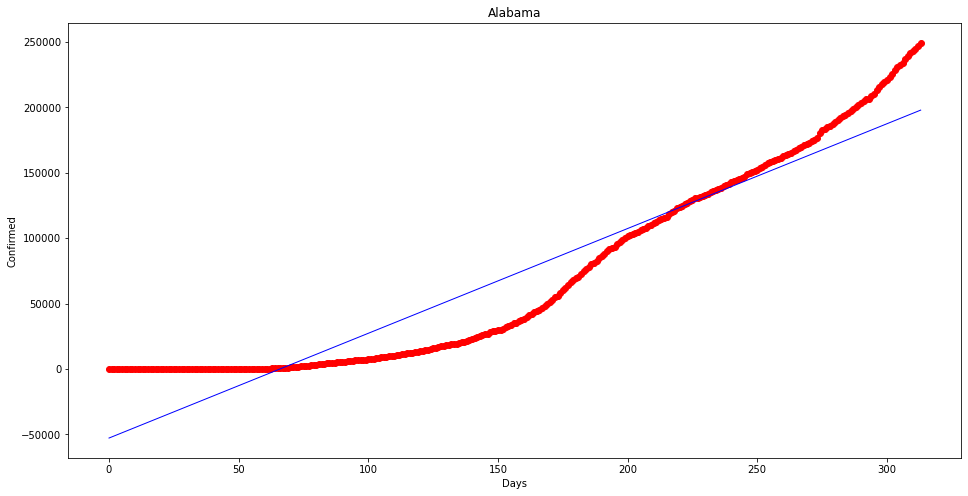

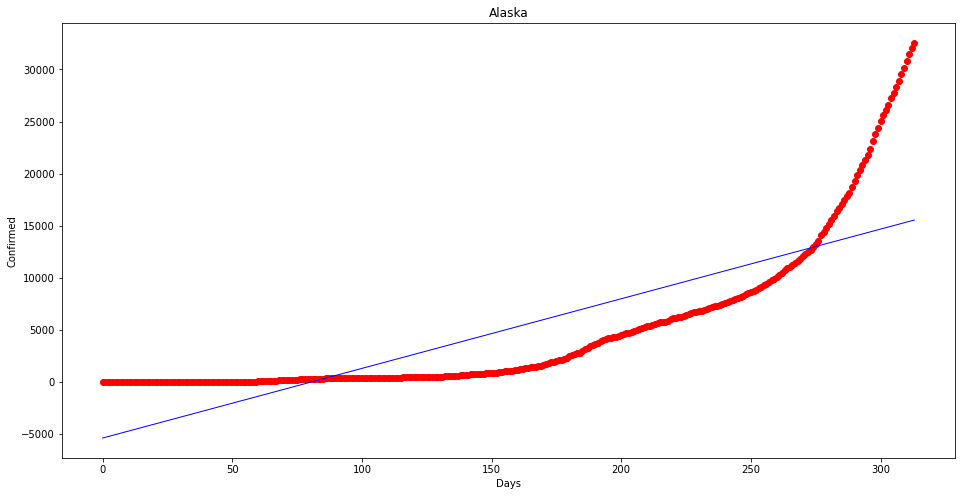

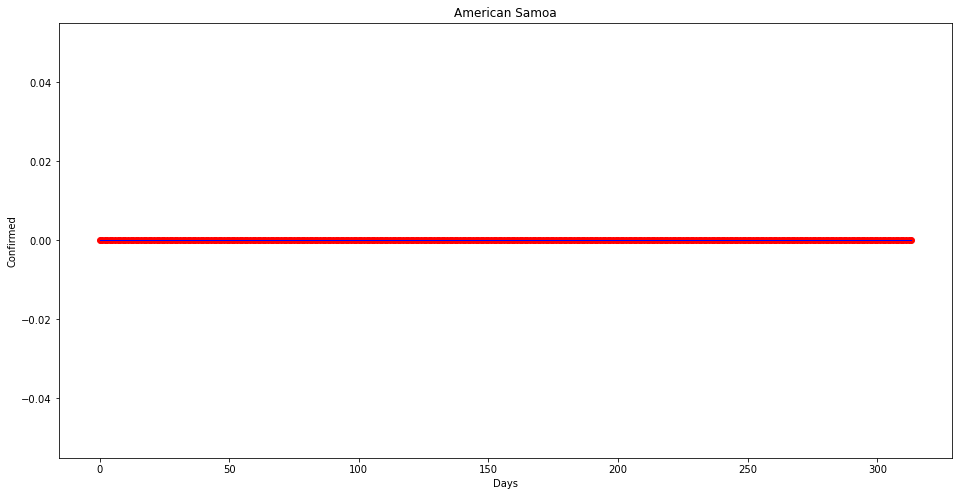

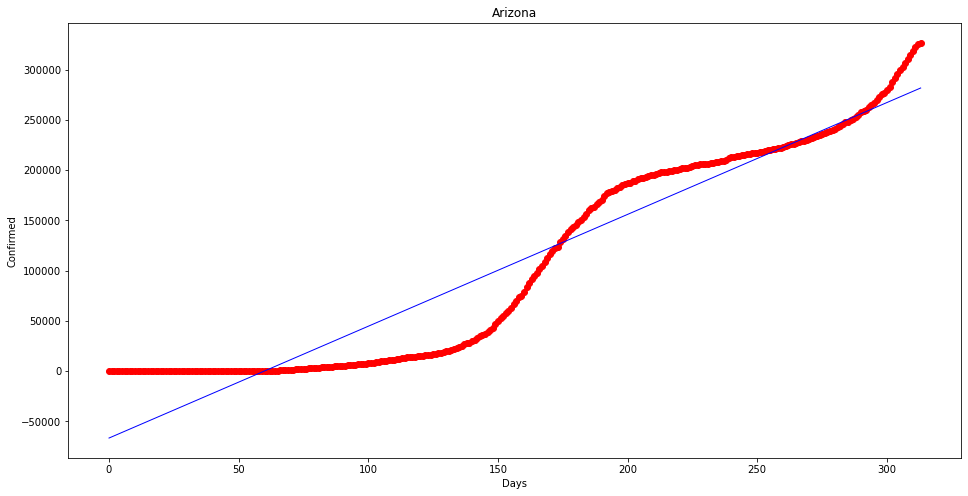

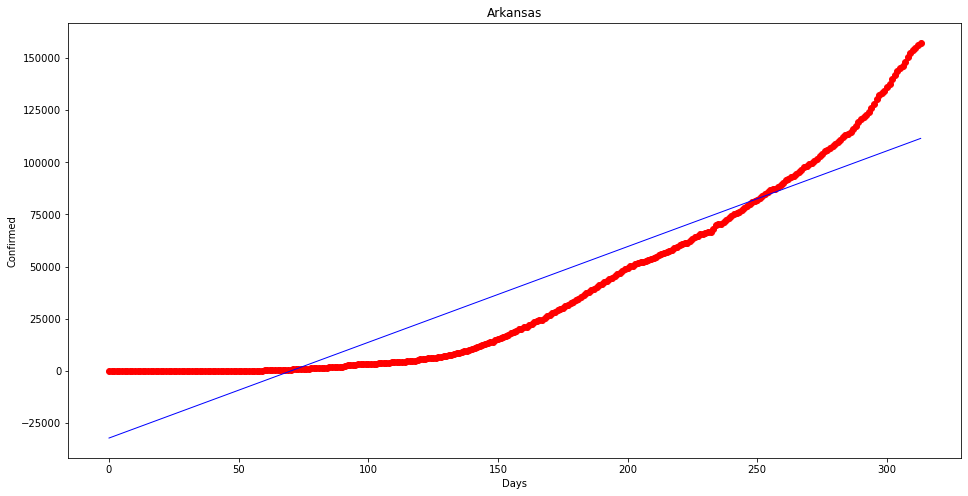

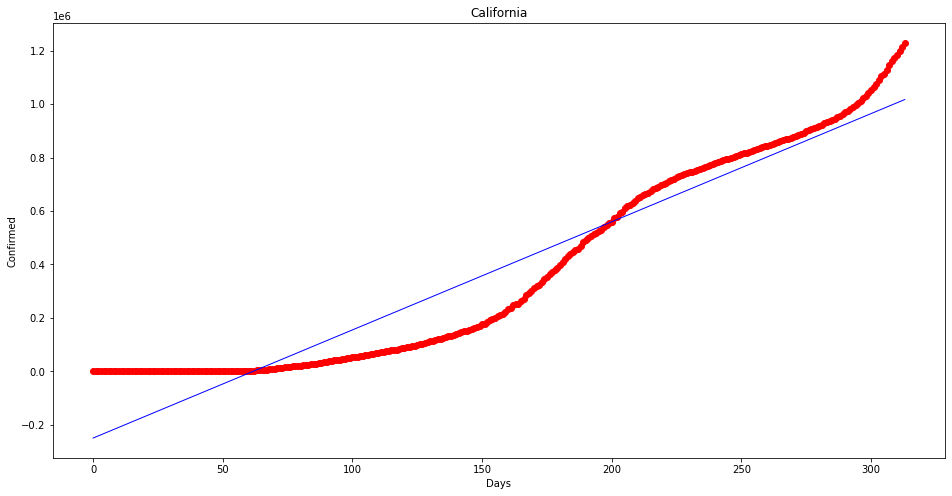

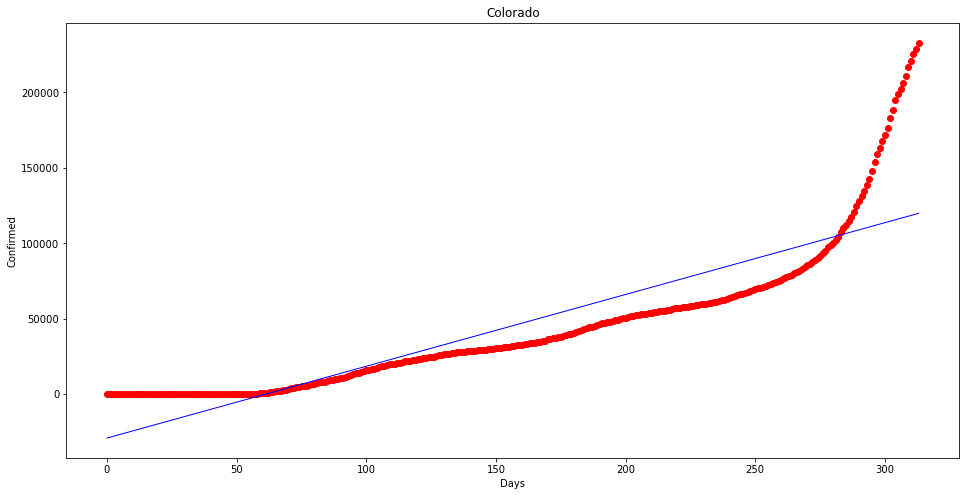

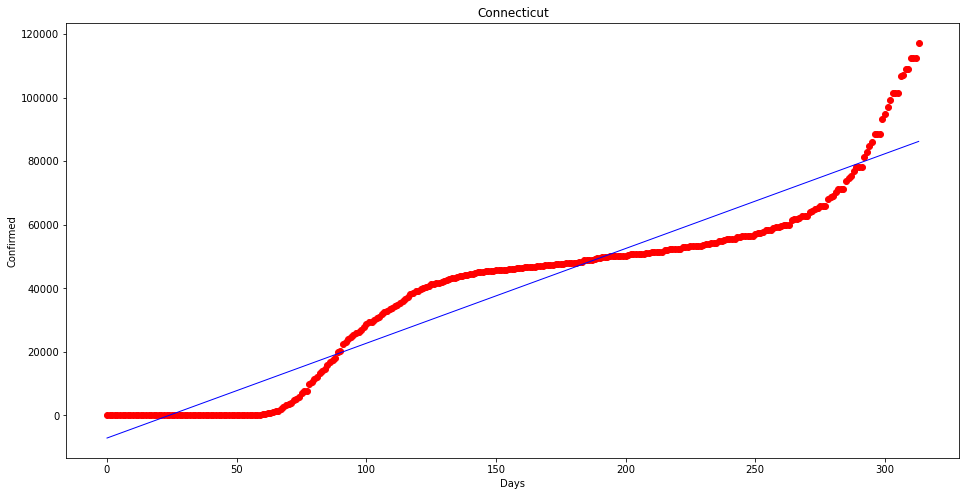

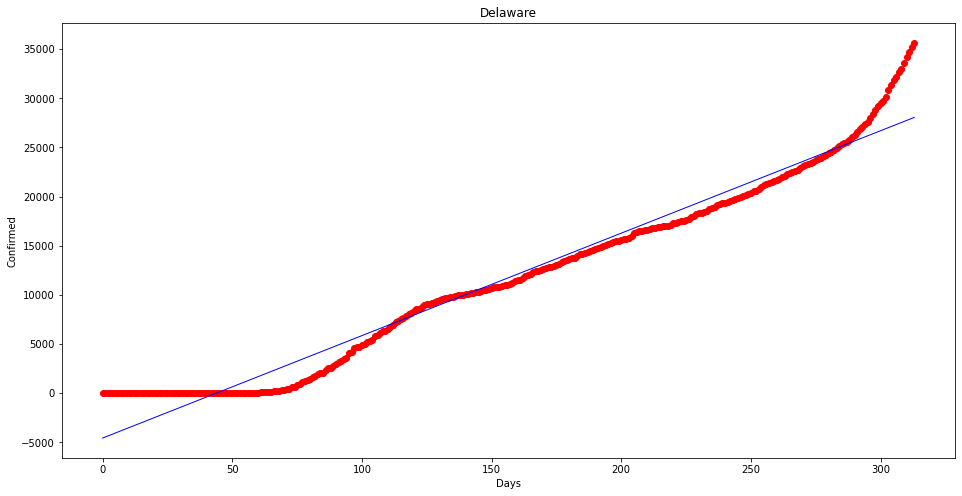

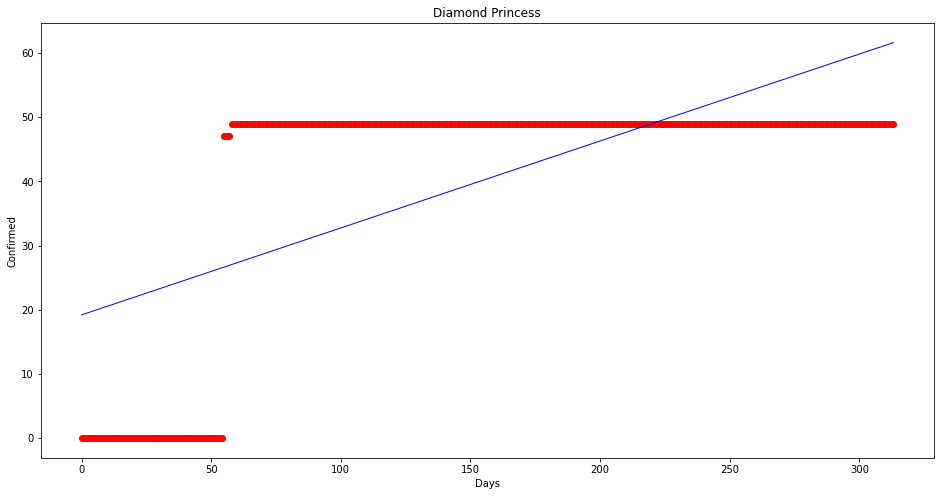

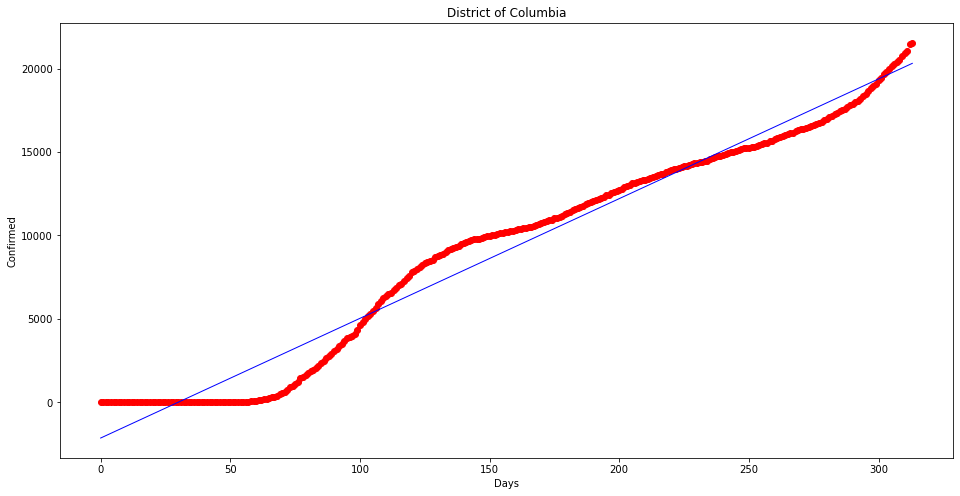

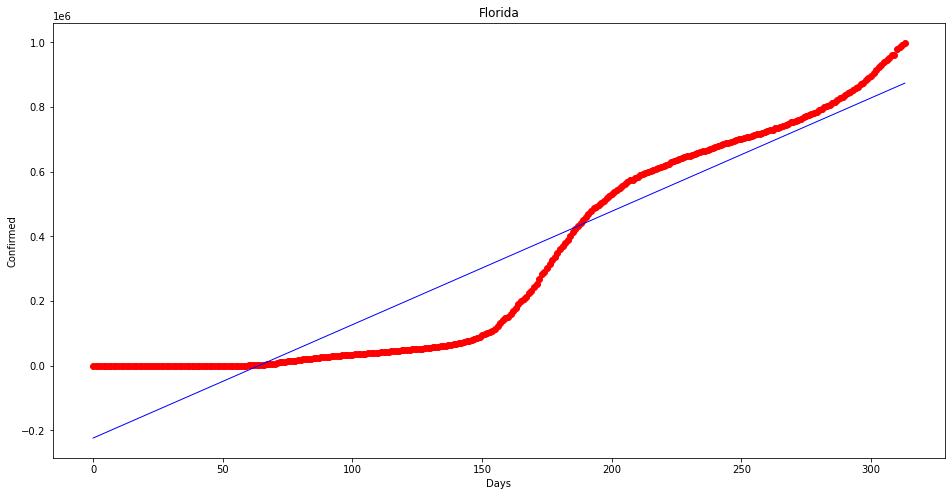

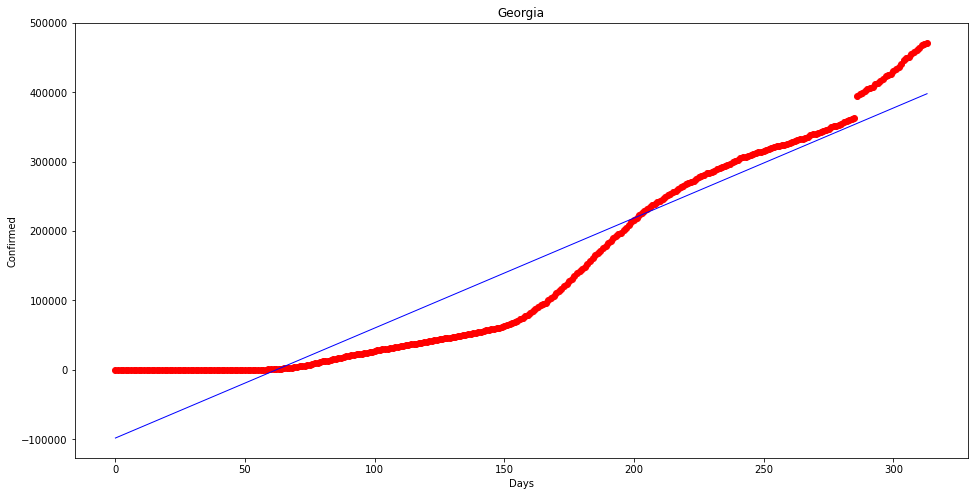

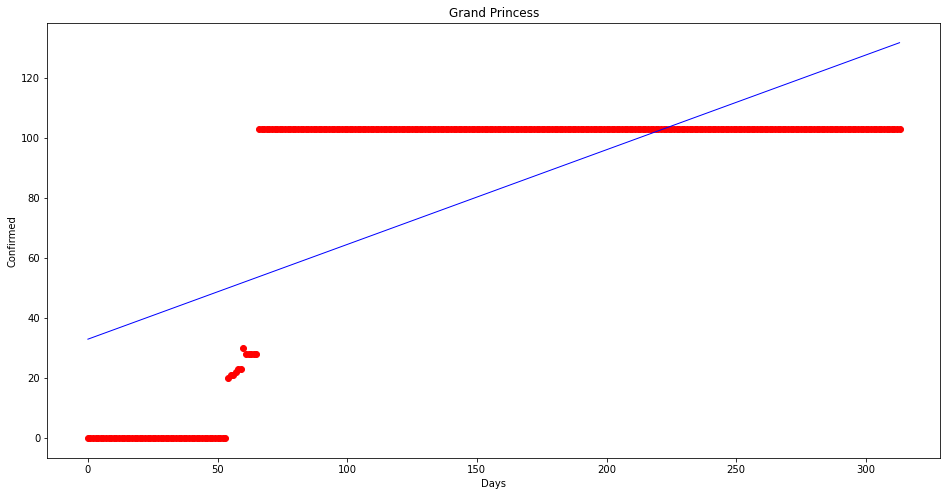

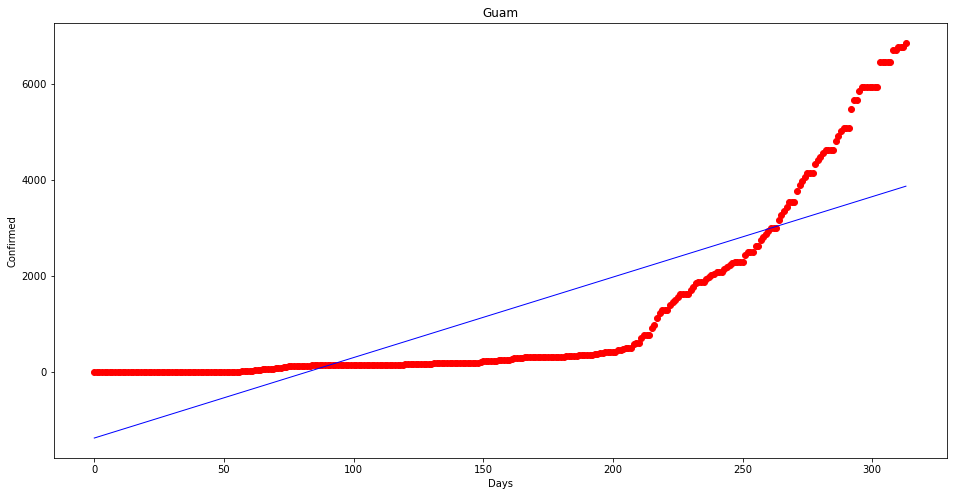

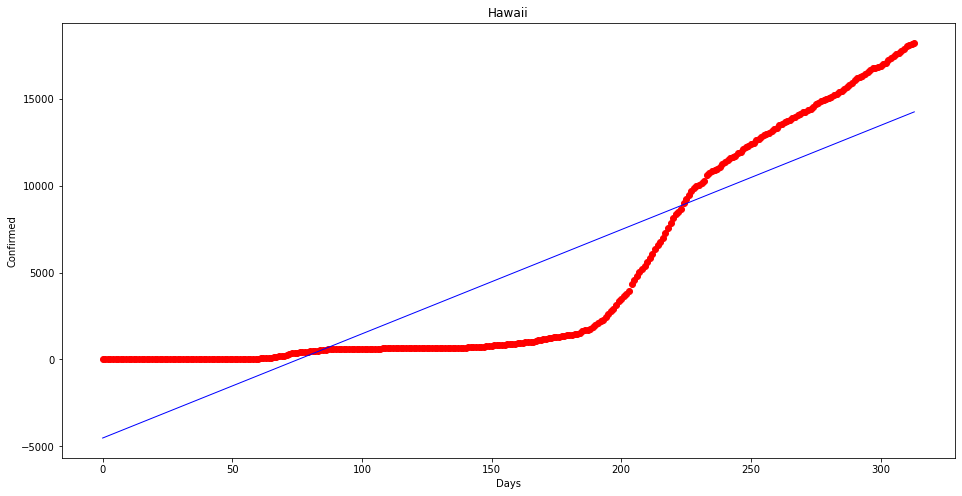

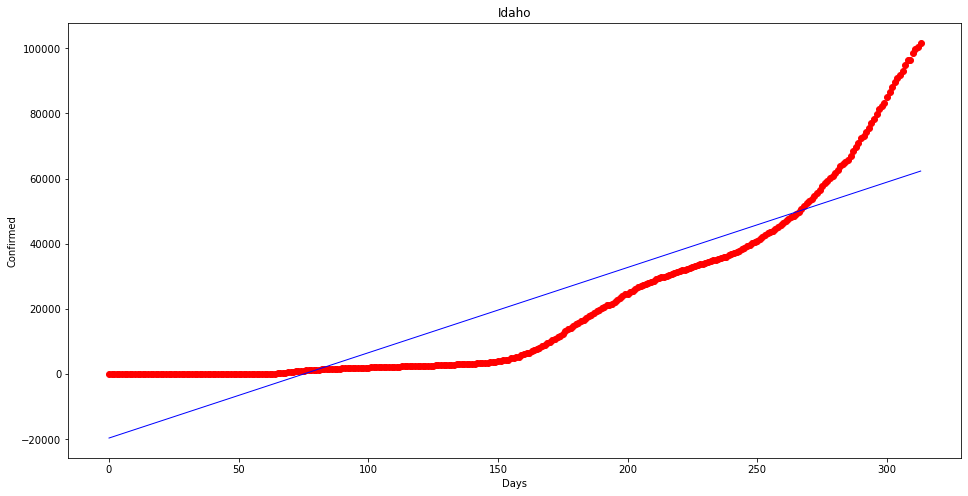

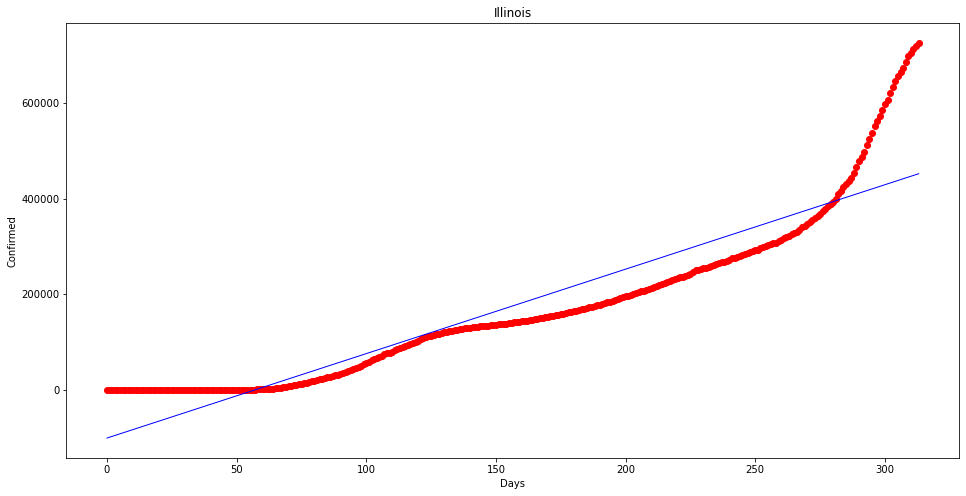

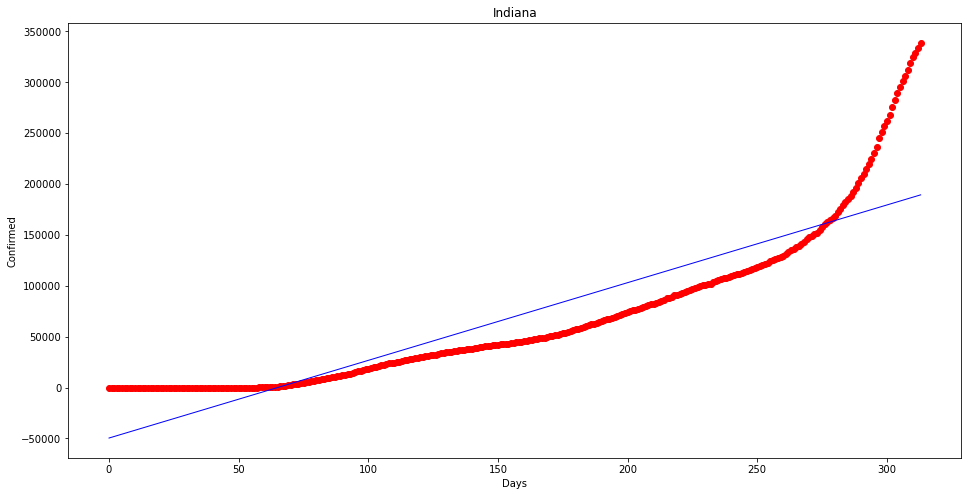

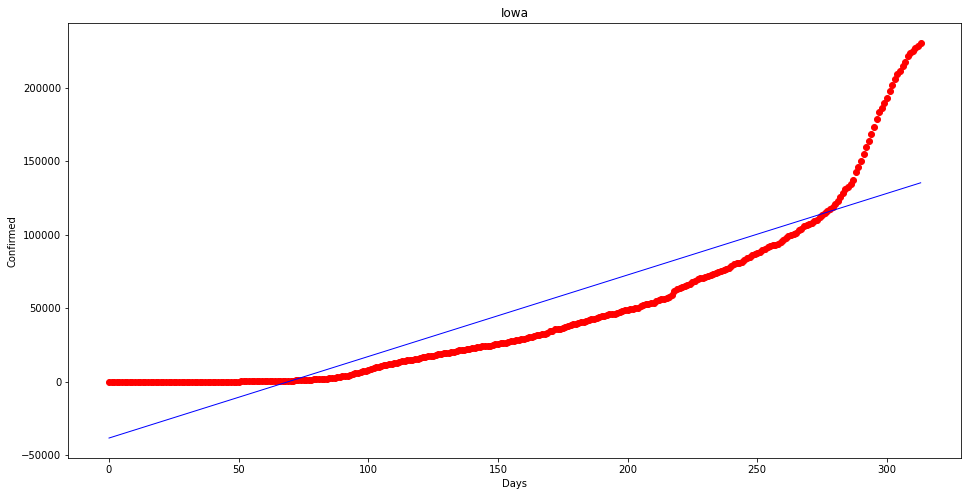

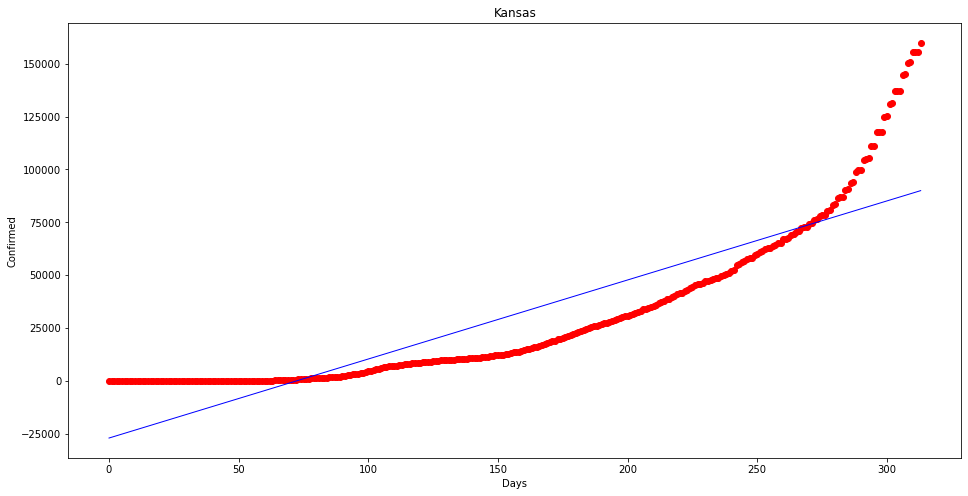

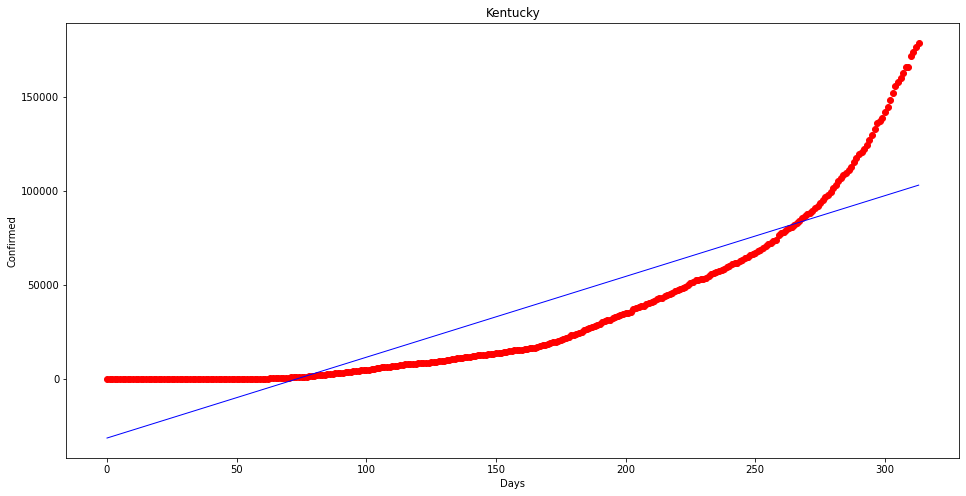

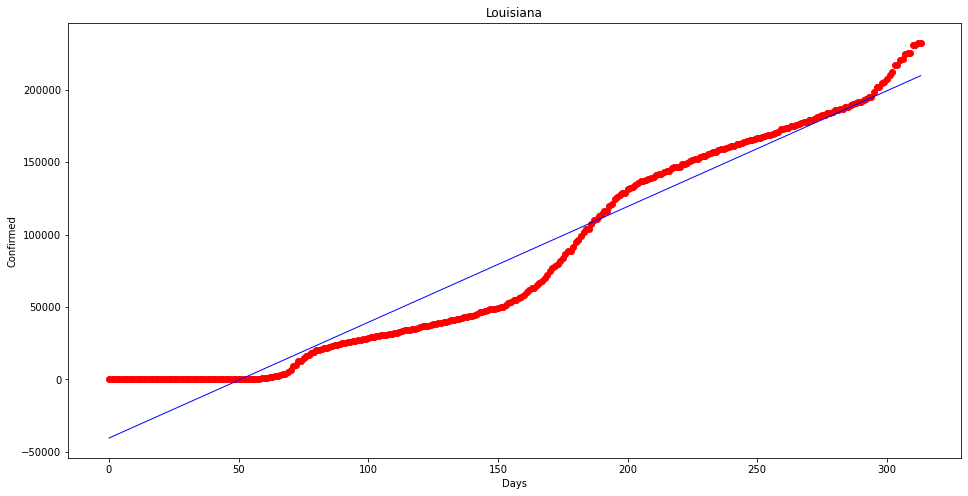

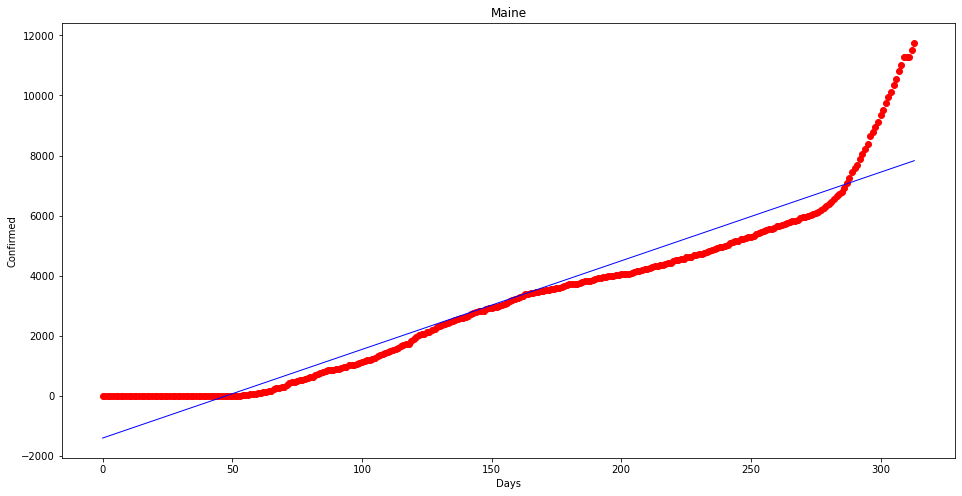

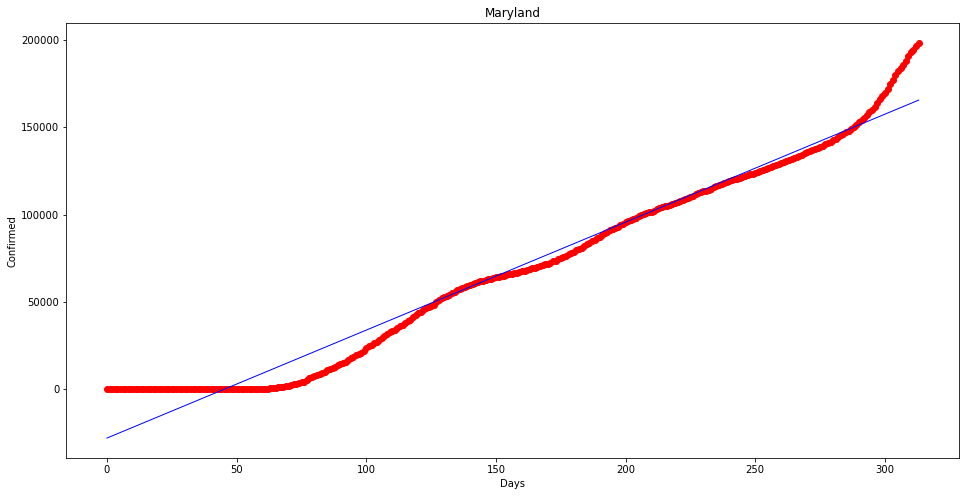

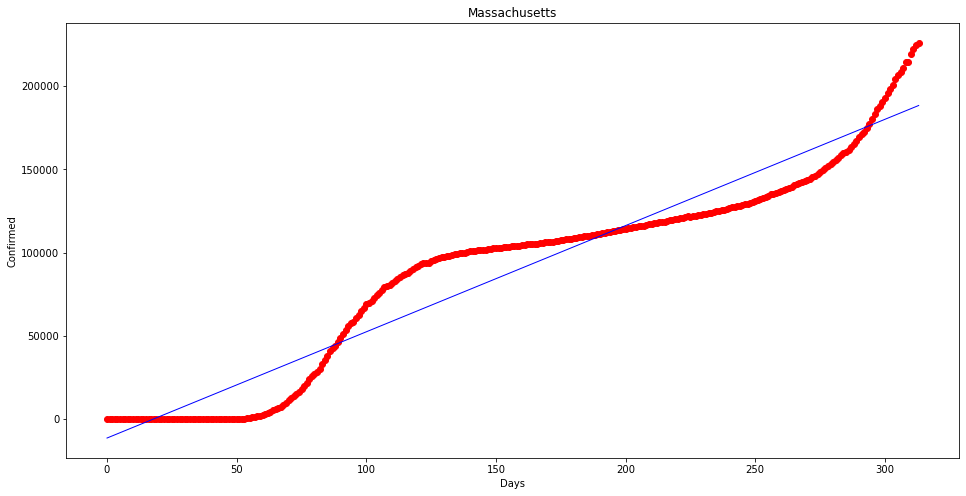

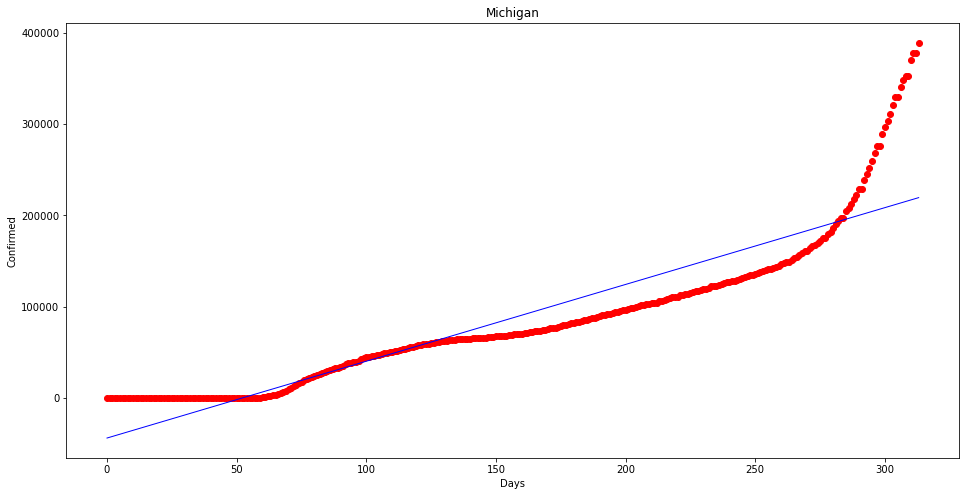

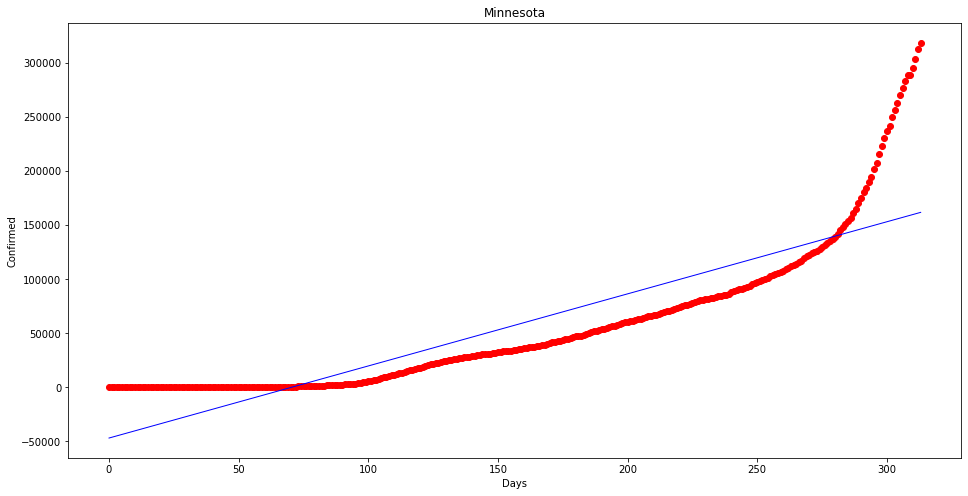

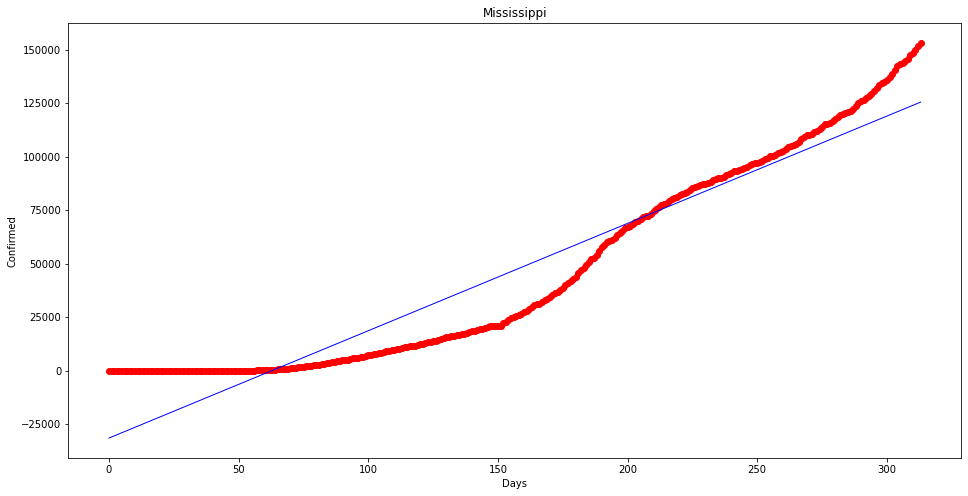

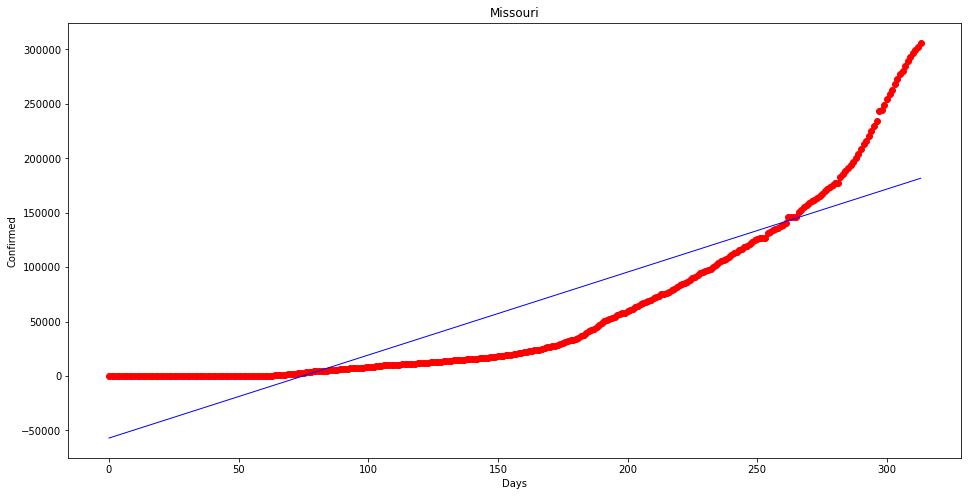

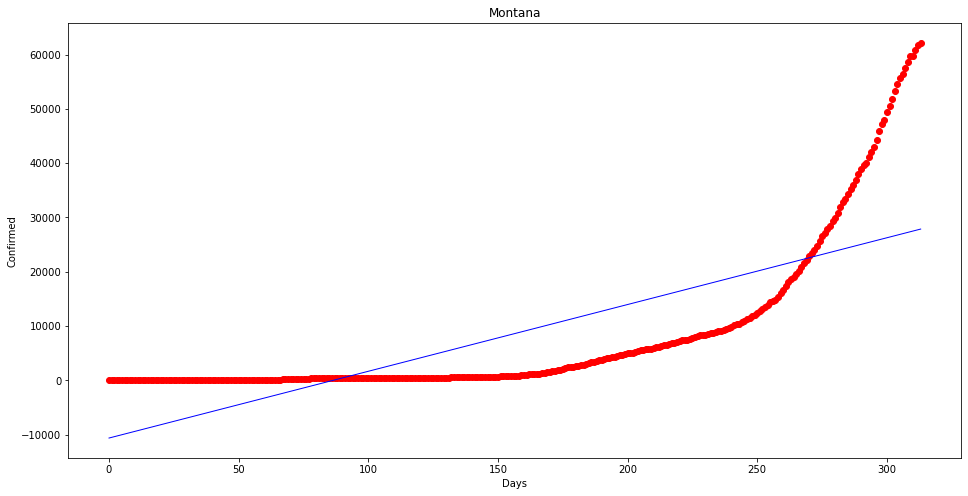

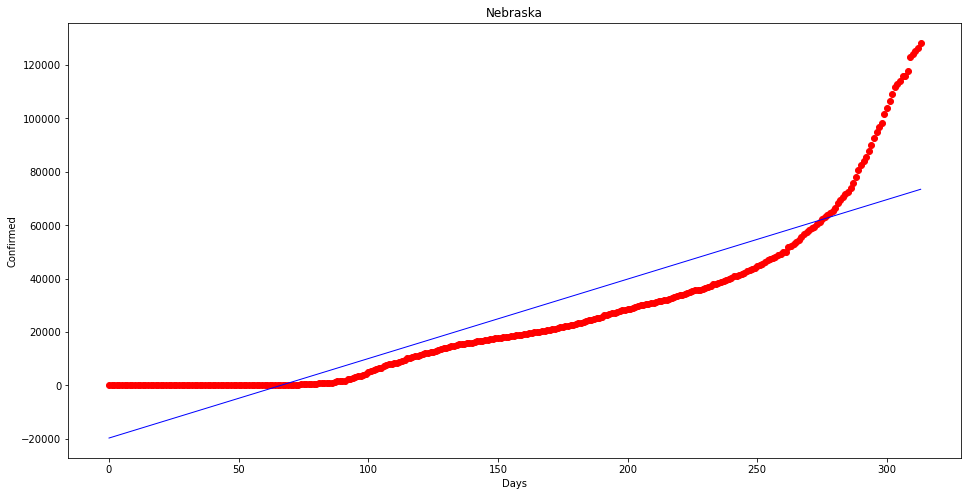

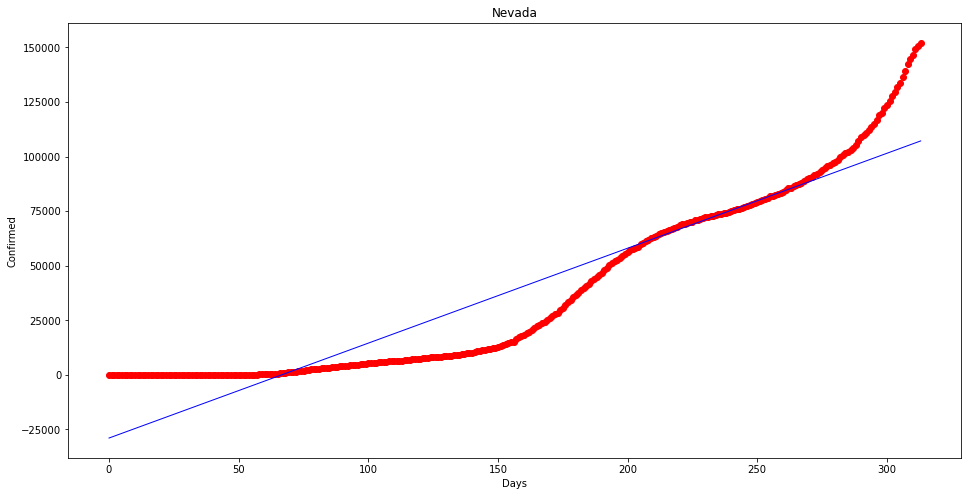

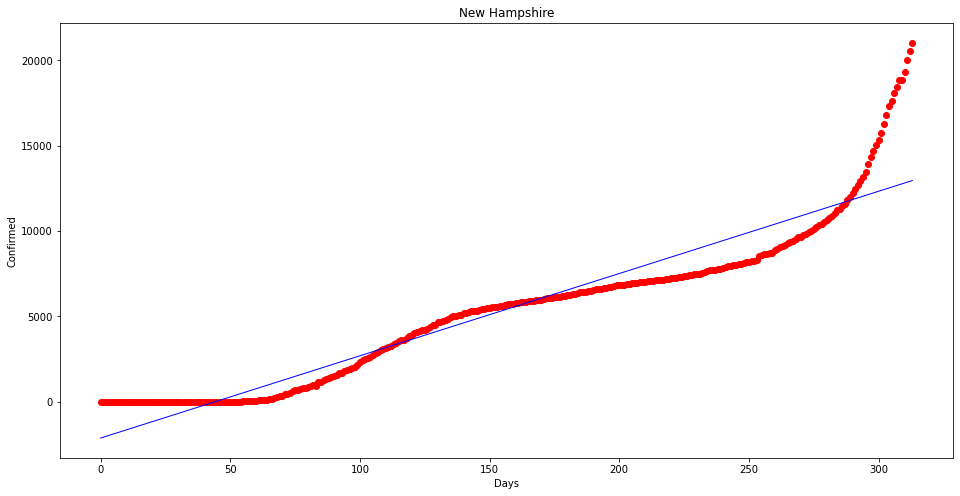

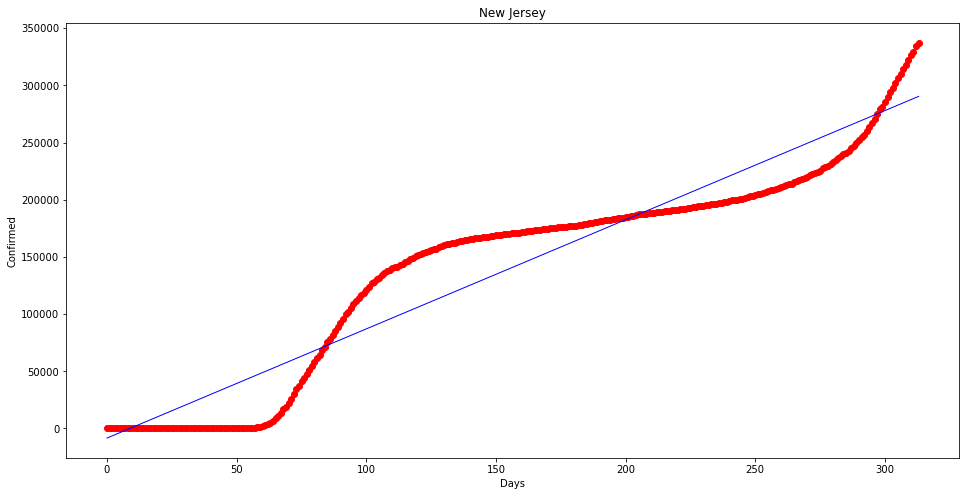

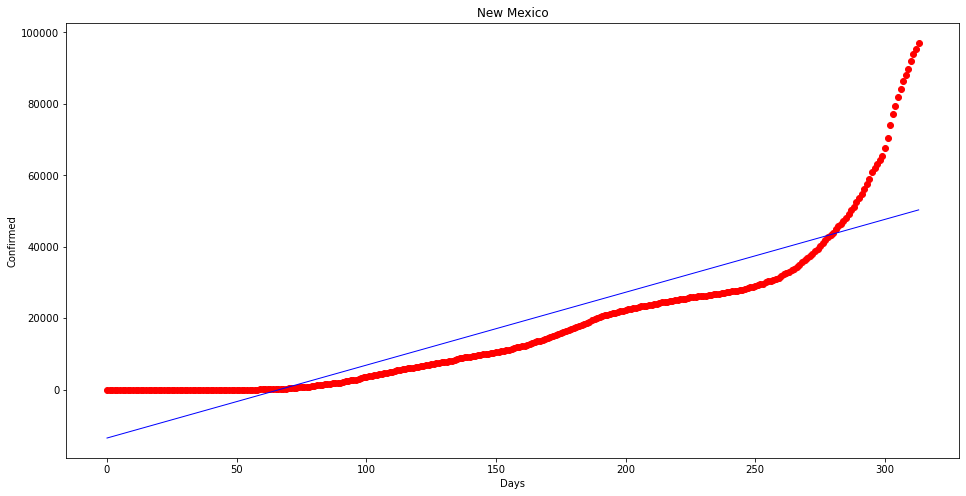

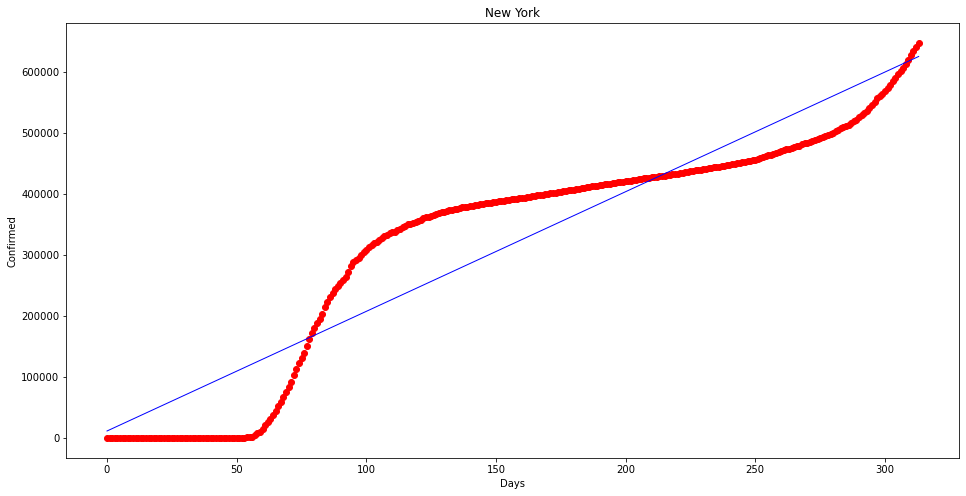

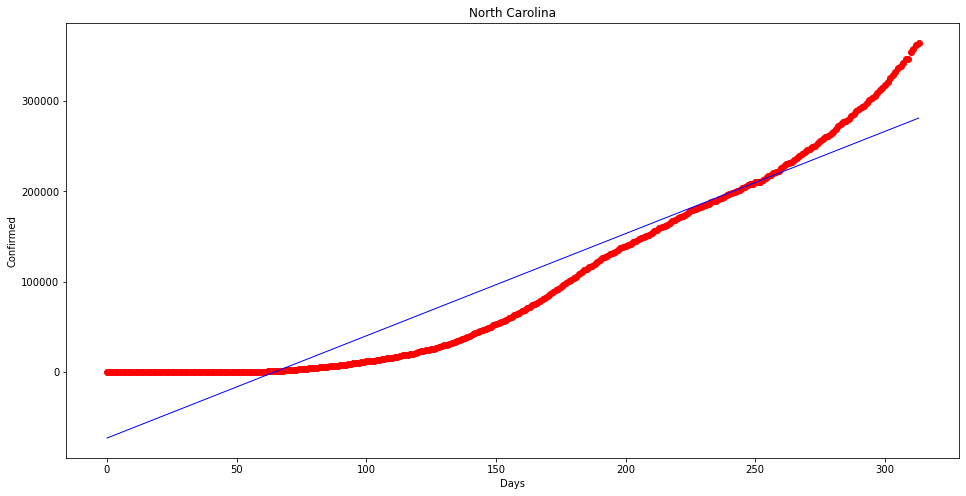

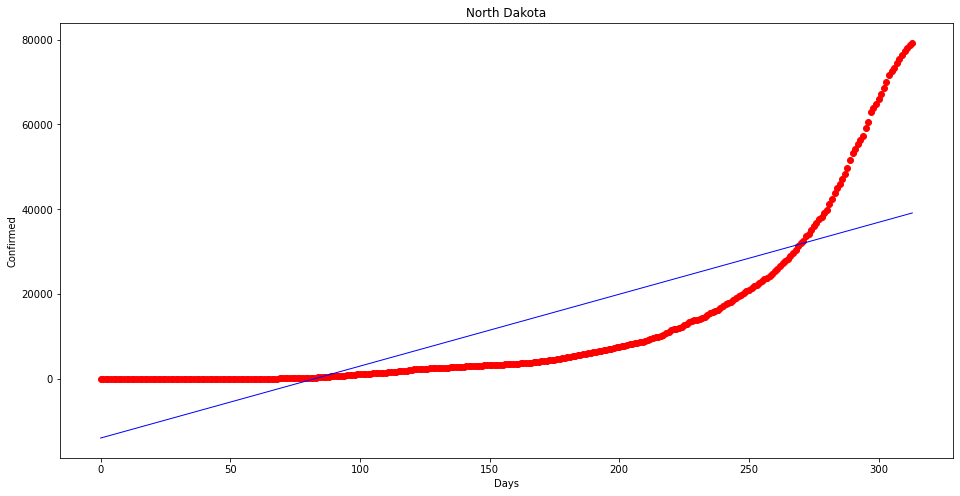

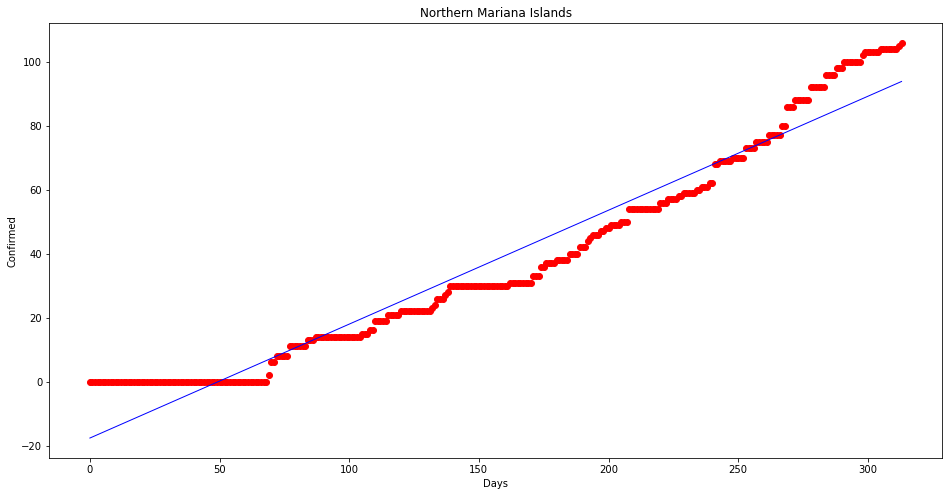

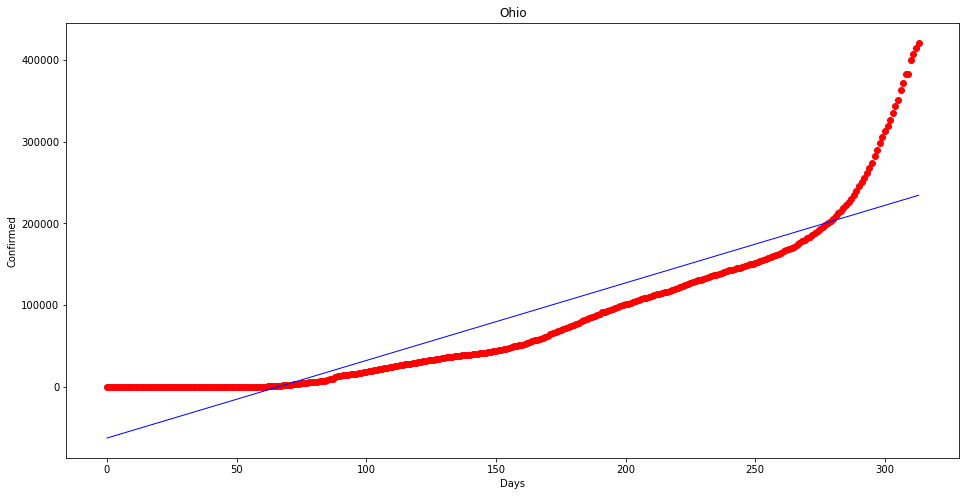

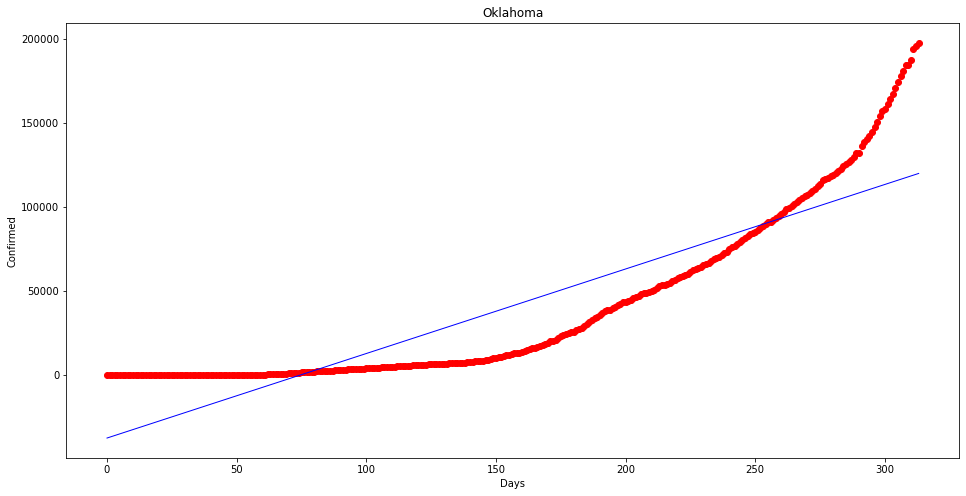

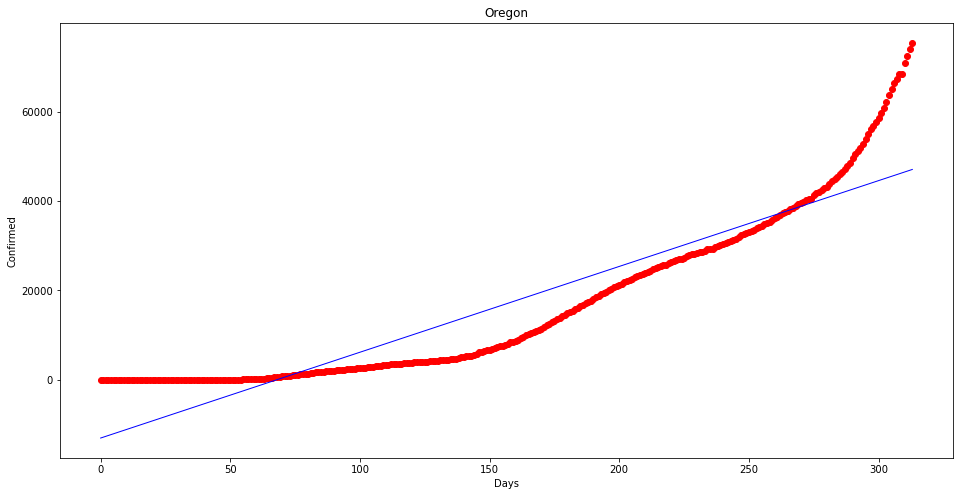

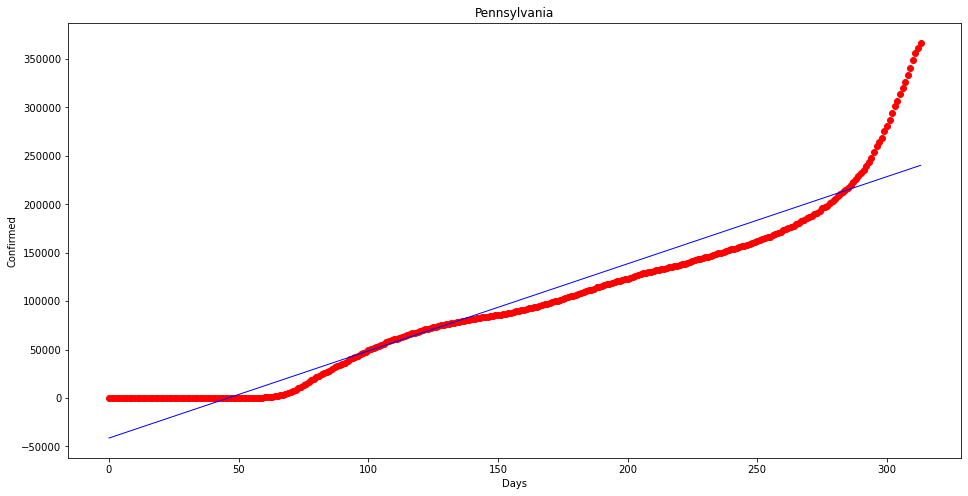

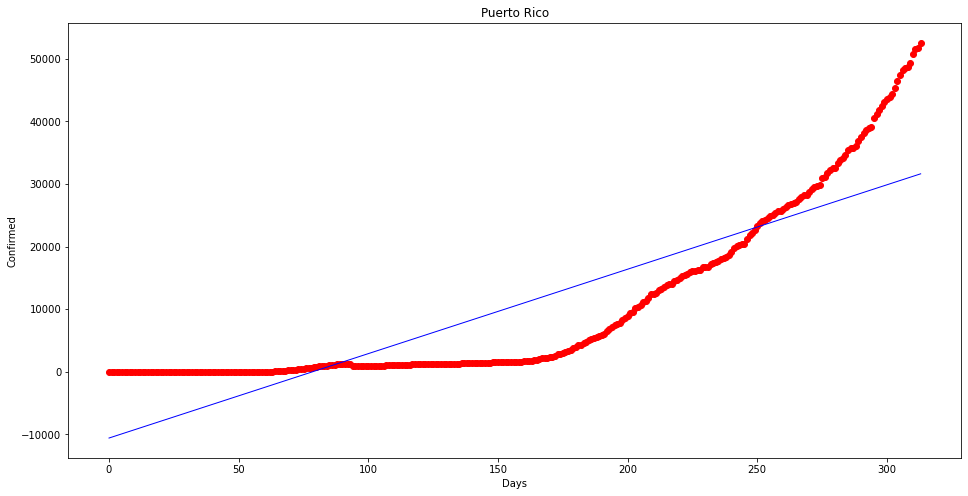

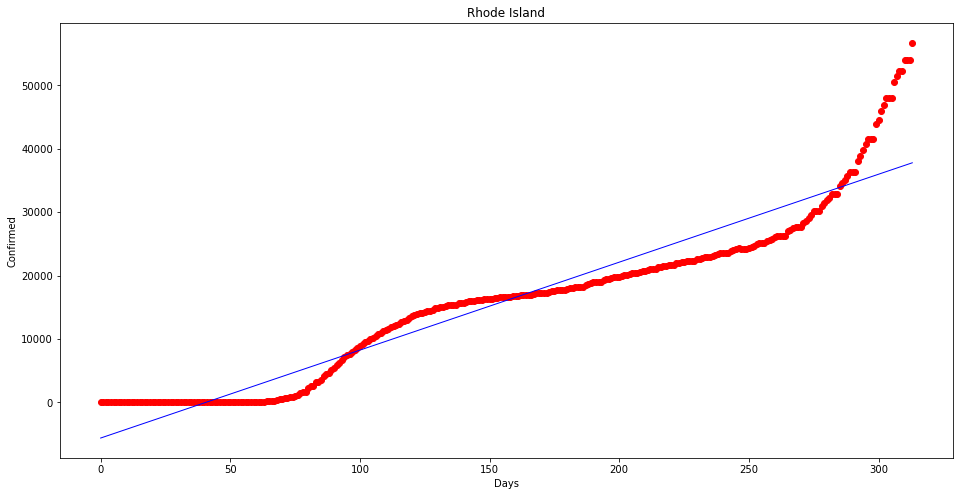

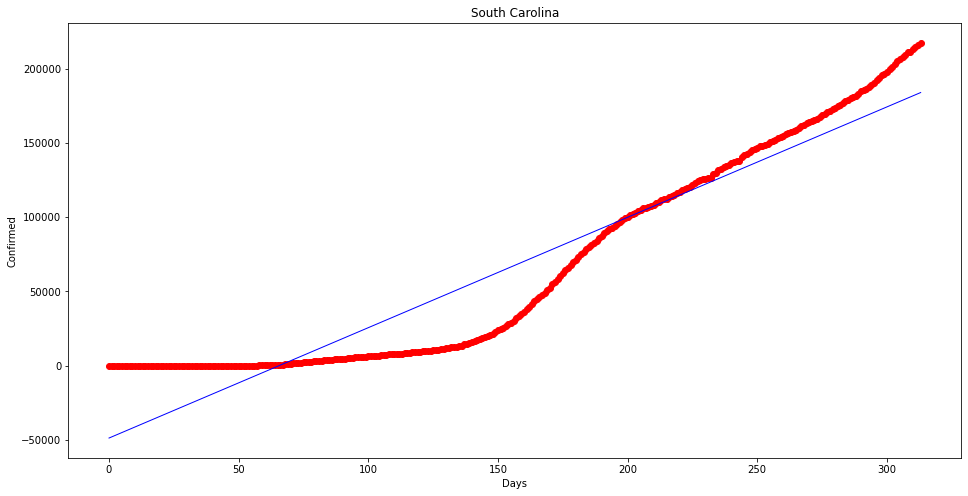

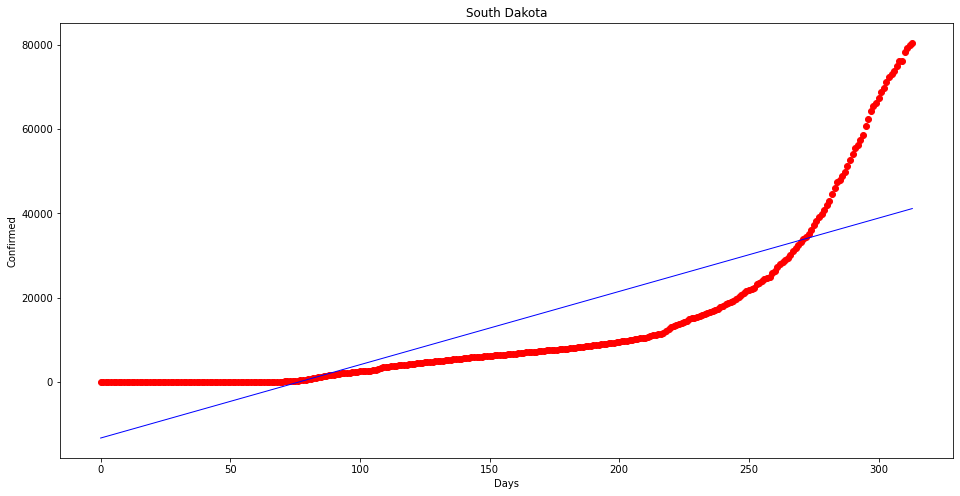

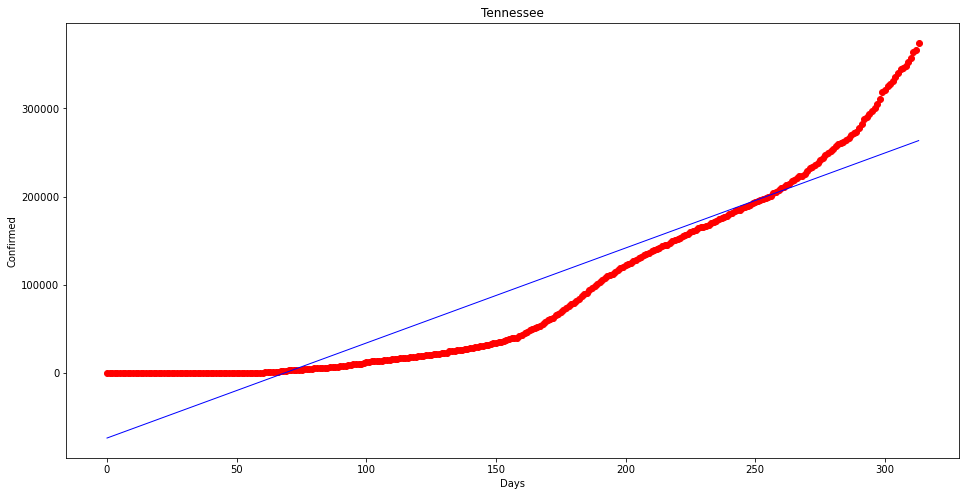

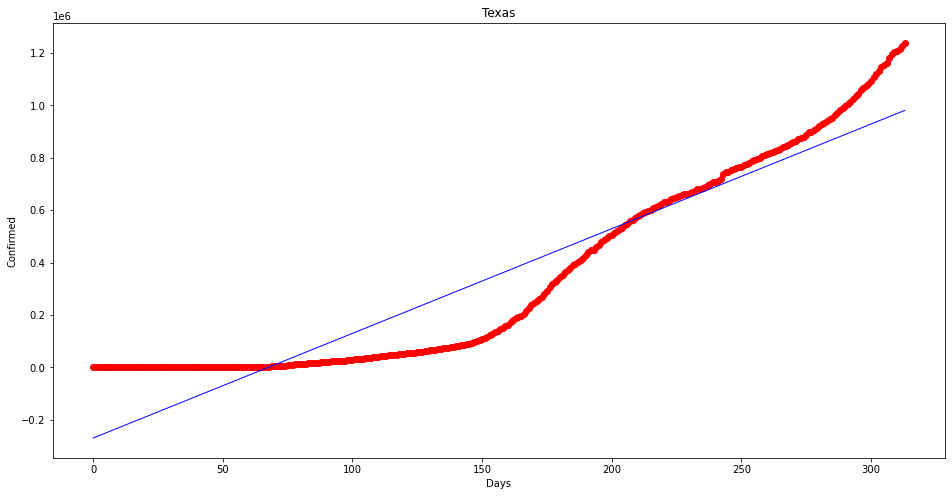

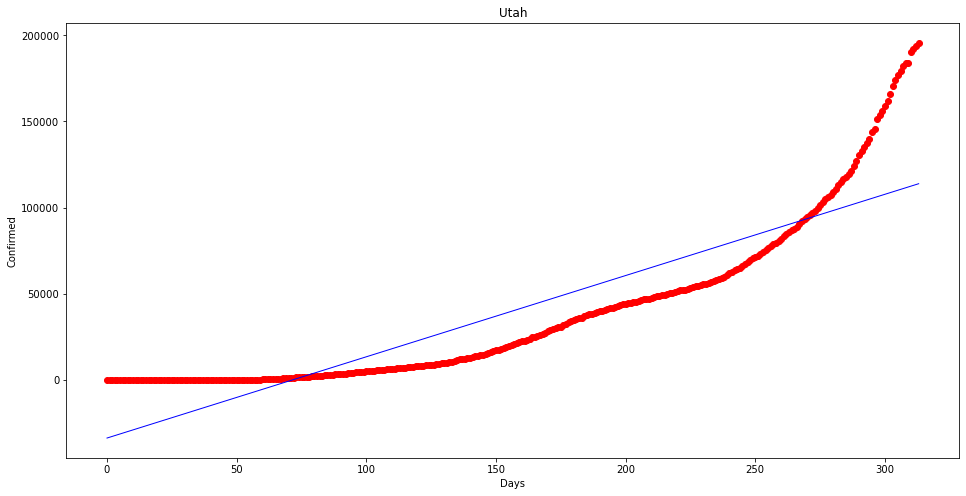

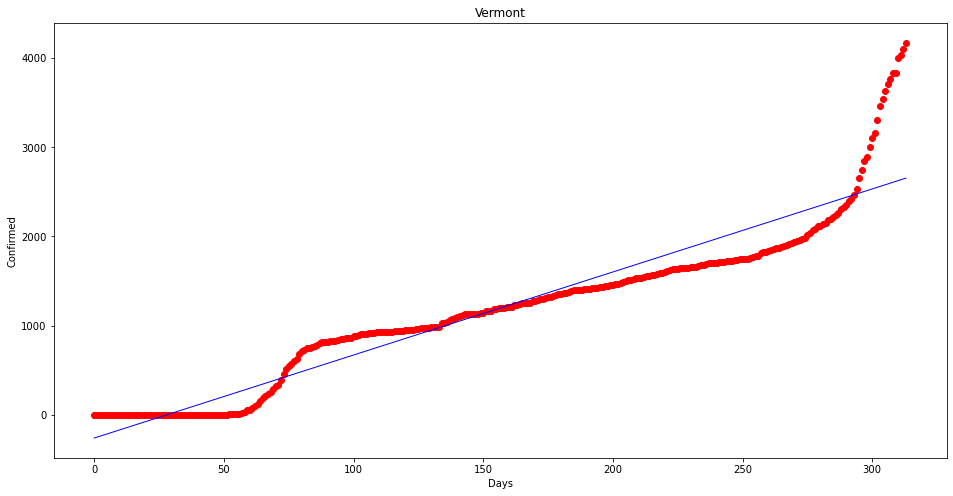

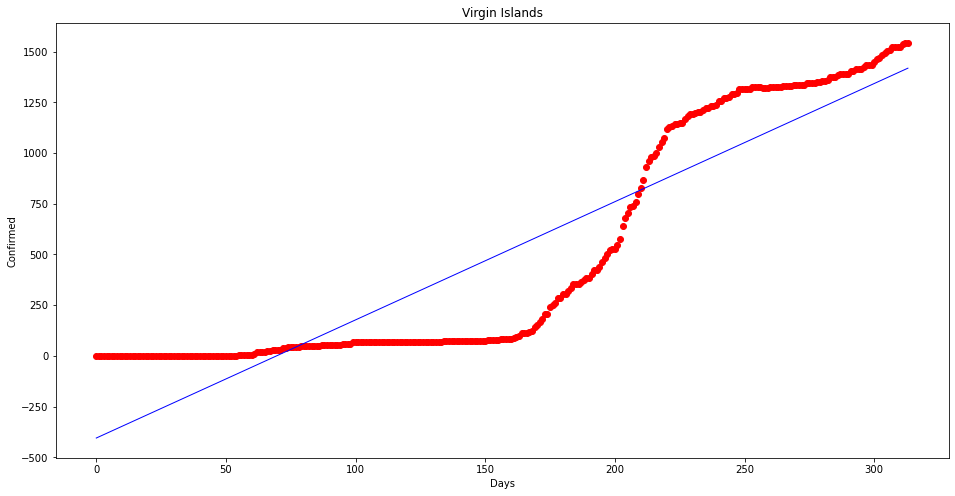

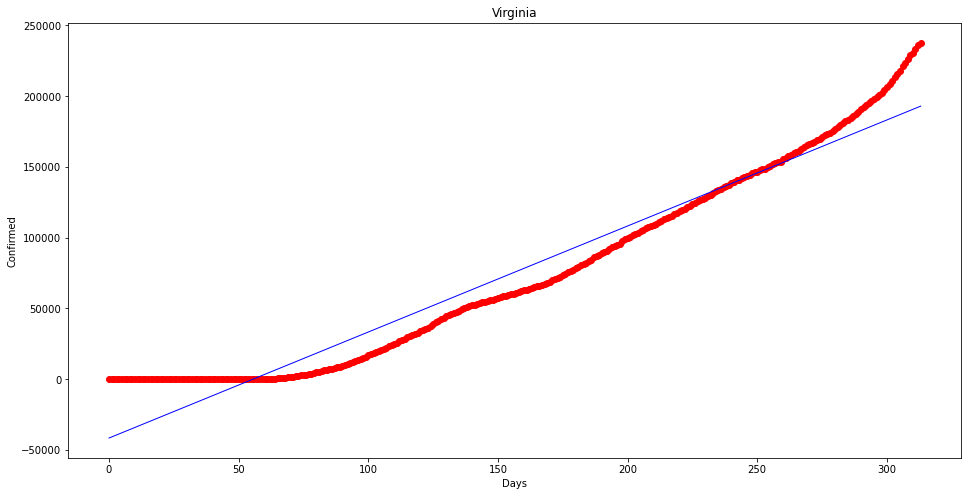

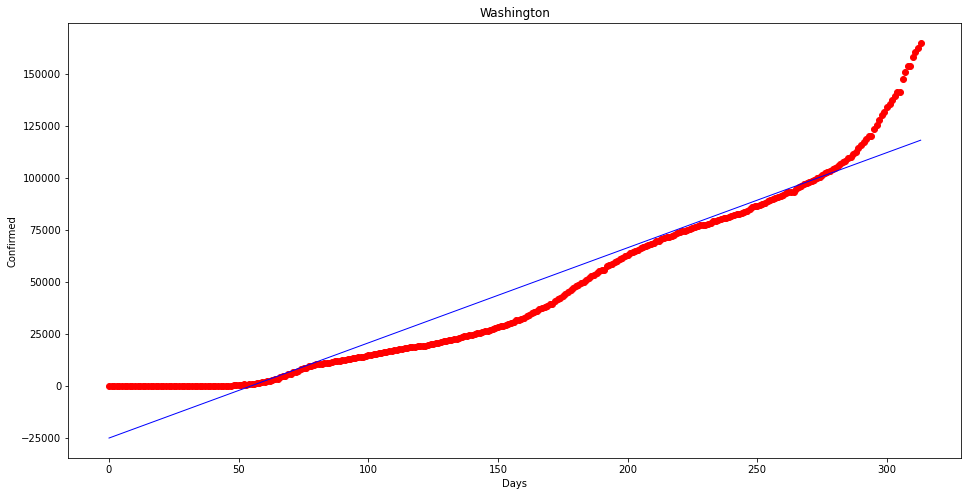

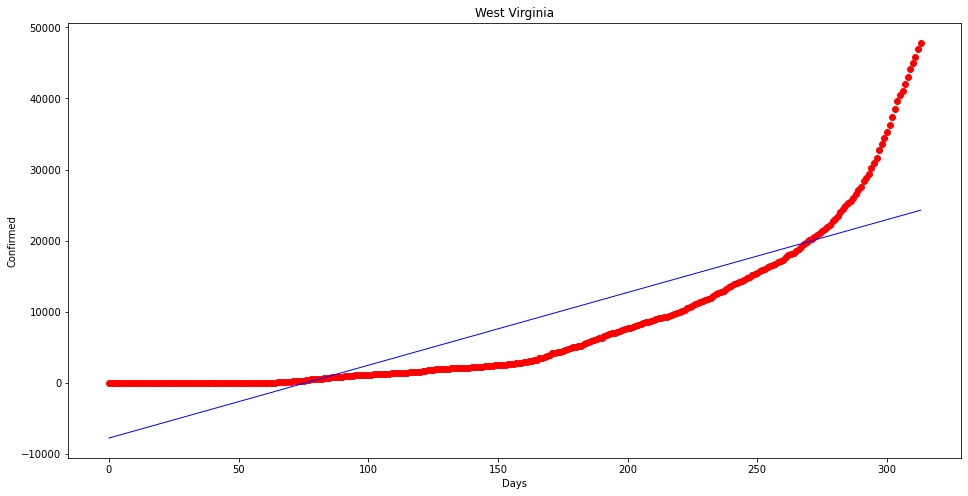

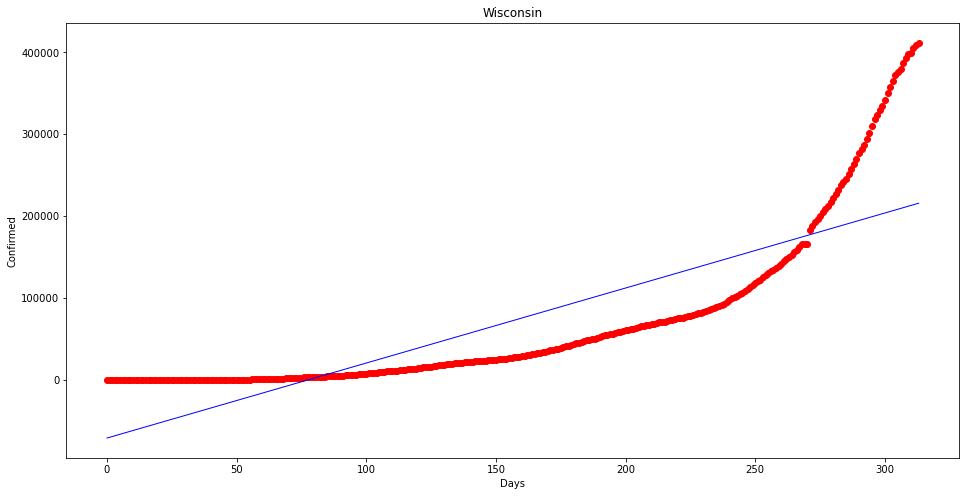

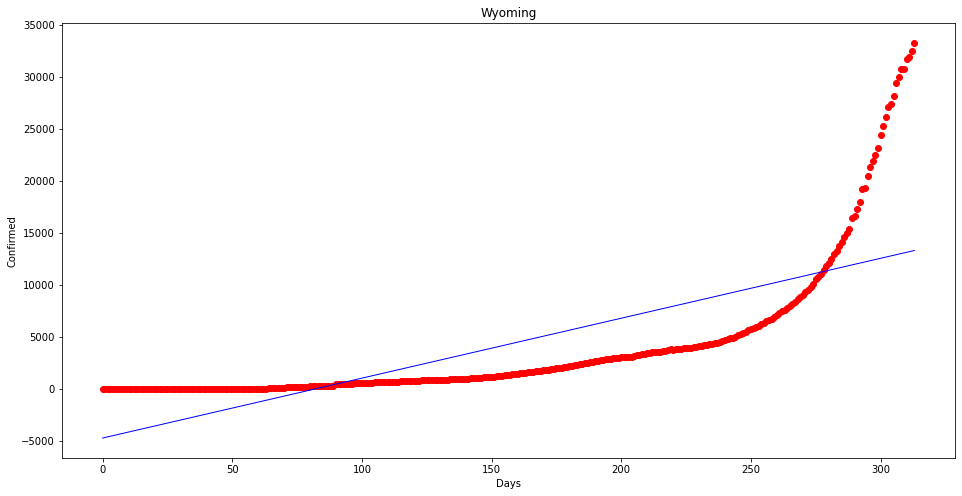

In [27]:
for s in lists:
    Ill = full_grouped[full_grouped['Province_State'] == s]
    
    base = alt.Chart(Ill).mark_bar().encode(
        x='monthdate(Date):O',
    ).properties(
        width=500
    )

    red = alt.value("#f54242")

    base.encode(y = 'Confirmed').properties(title = 'Total Confirmed') | base.encode(y = 'Deaths', color = red).properties(title = 'Total Deaths')


    Ill = Ill.reset_index()
    Ill['Days'] = Ill.index


    X = Ill['Days'].values.reshape(-1,1)
    y = Ill['Confirmed'].values.reshape(-1,1)


    reg = LinearRegression()
    reg.fit(X, y)
    p = reg.predict(X)
    plt.figure(figsize=(16, 8))
    plt.scatter(
        X,
        y,
        c='red'
    )
    plt.plot(
        X,
        p,
        c='blue',
        linewidth=1
    )


#     plt.xticks(np.arange(Ill.shape[0])[::20], Ill.Date[1::20], rotation=35)
    #plt.set_xticklabels(Ill.date)
    plt.title(s)
    plt.xlabel("Days")
    plt.ylabel("Confirmed")
    plt.show()



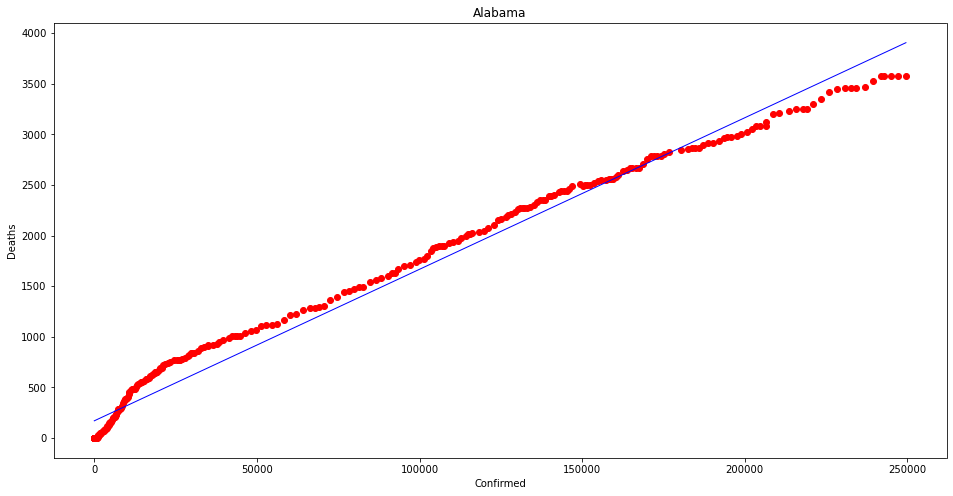

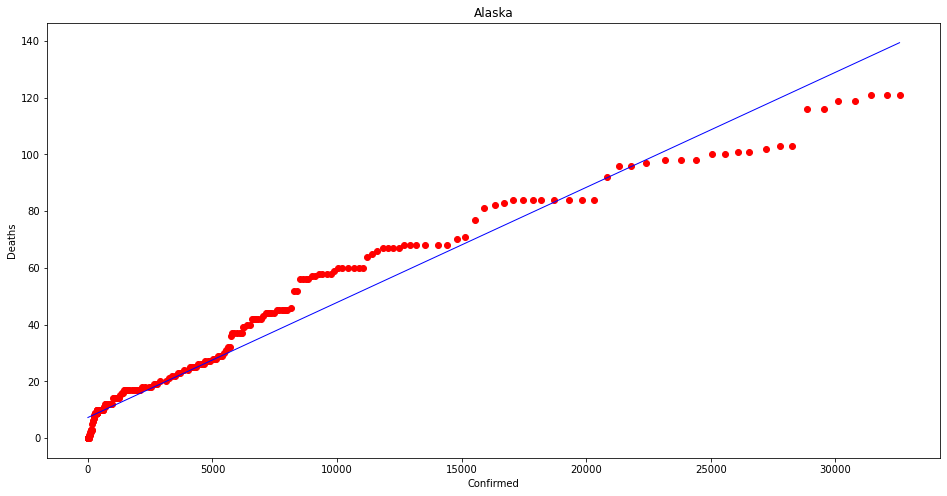

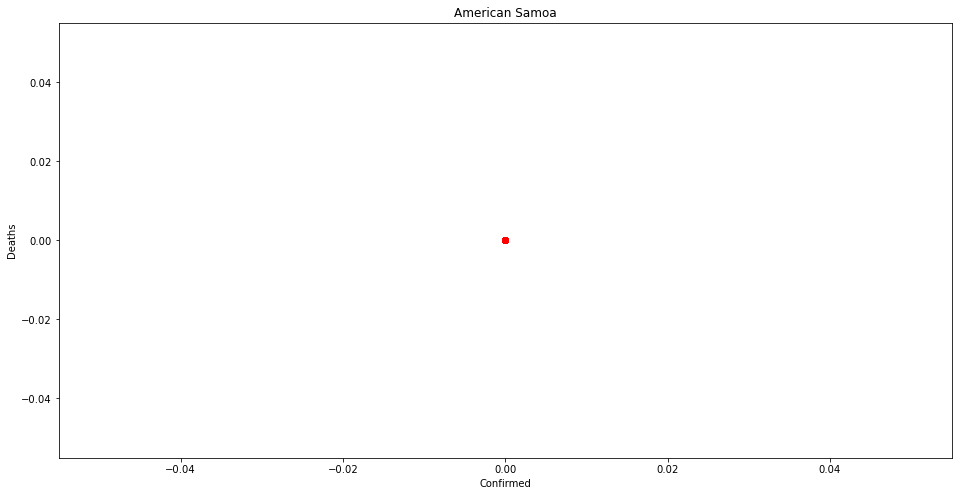

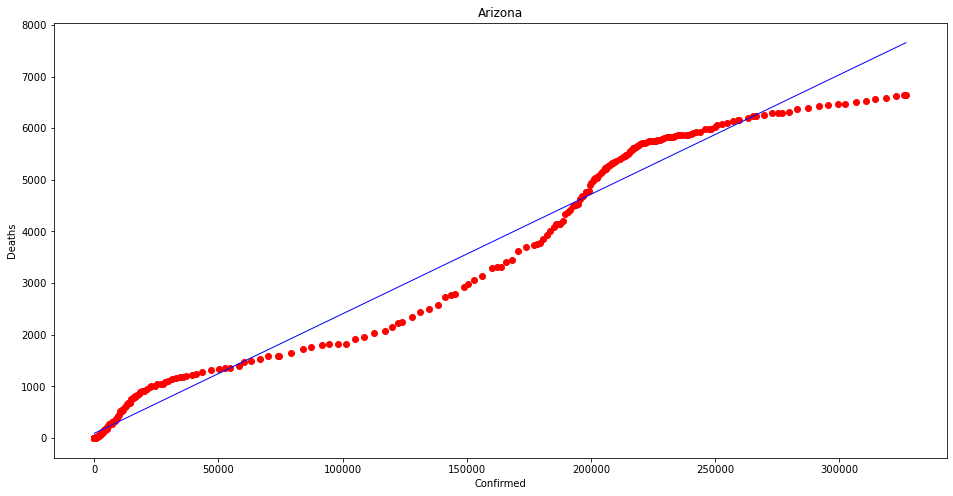

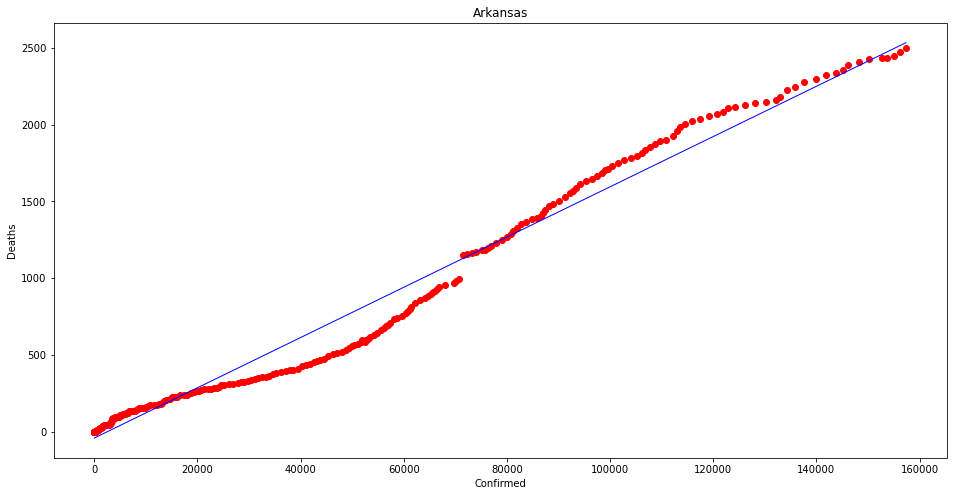

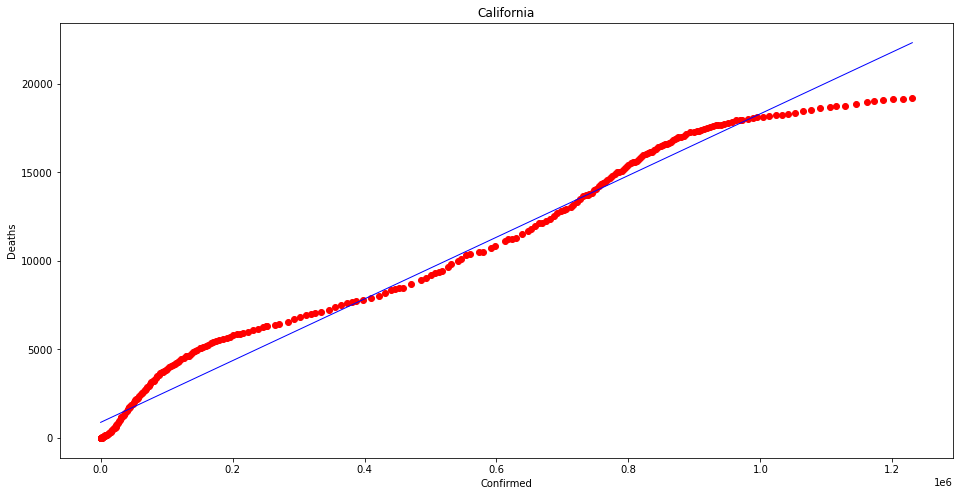

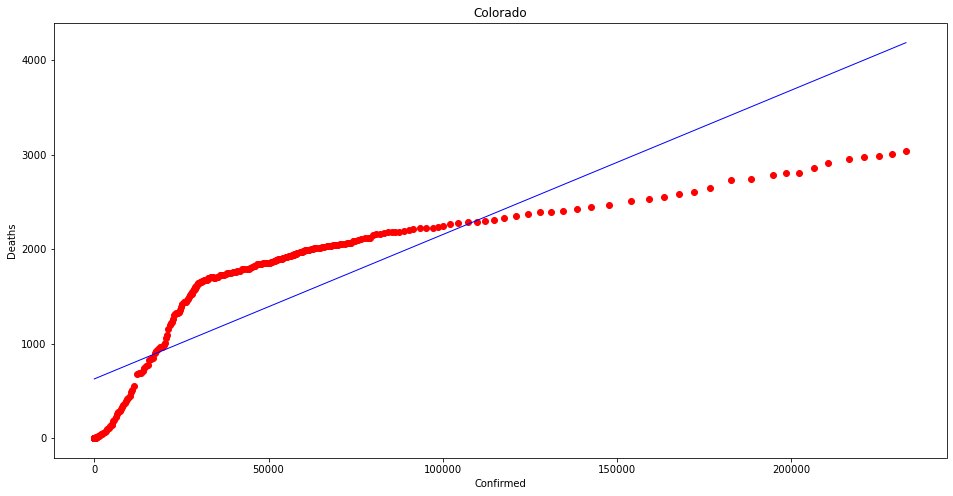

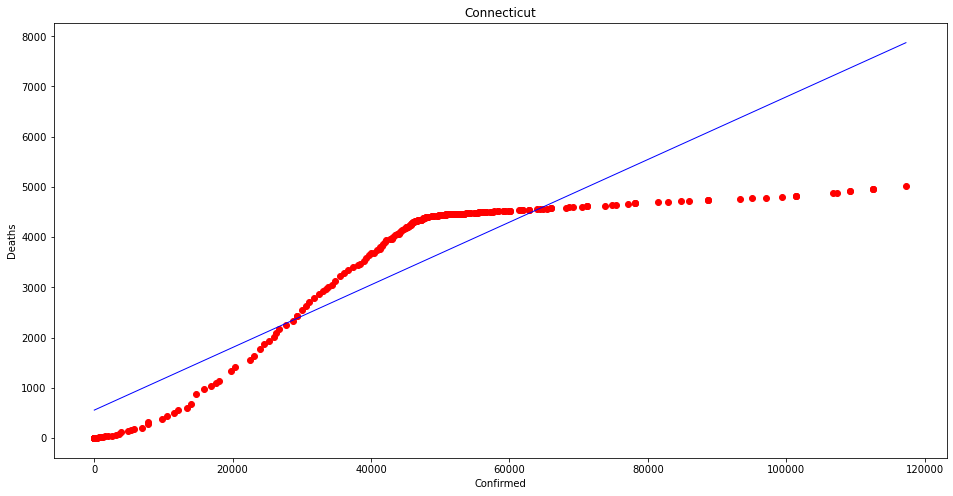

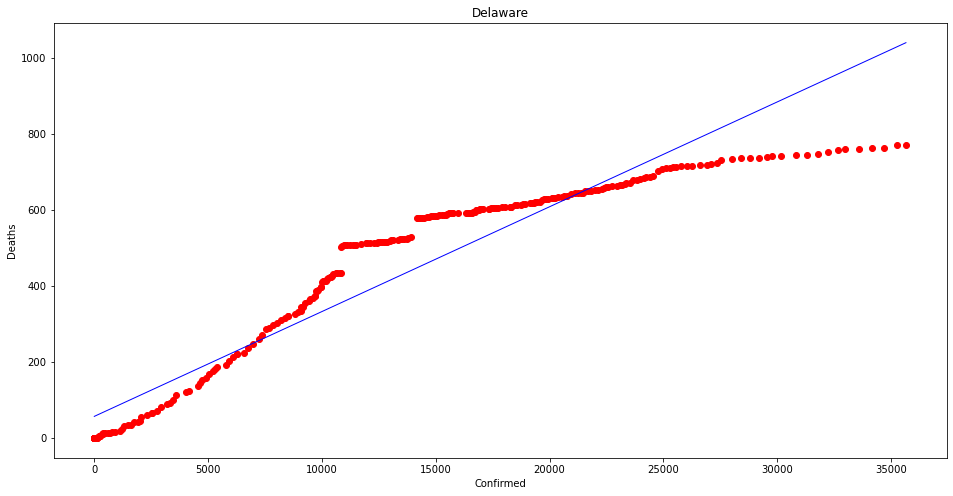

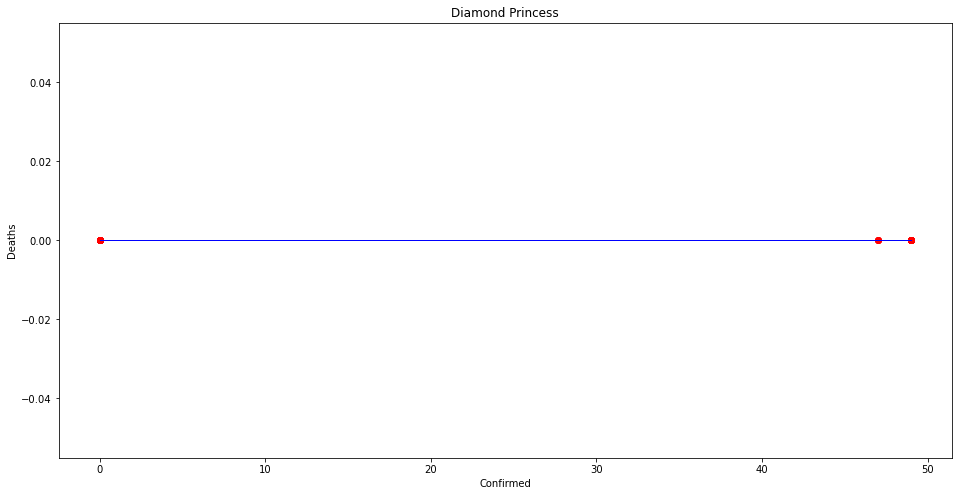

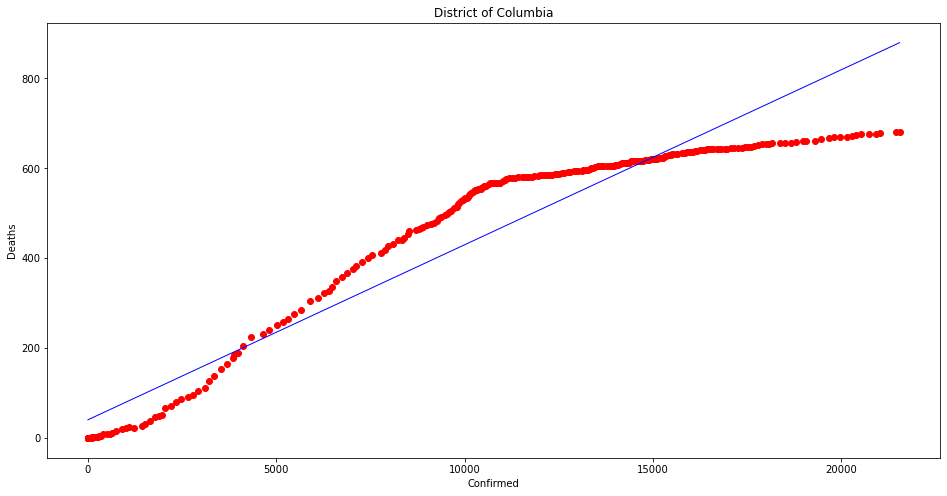

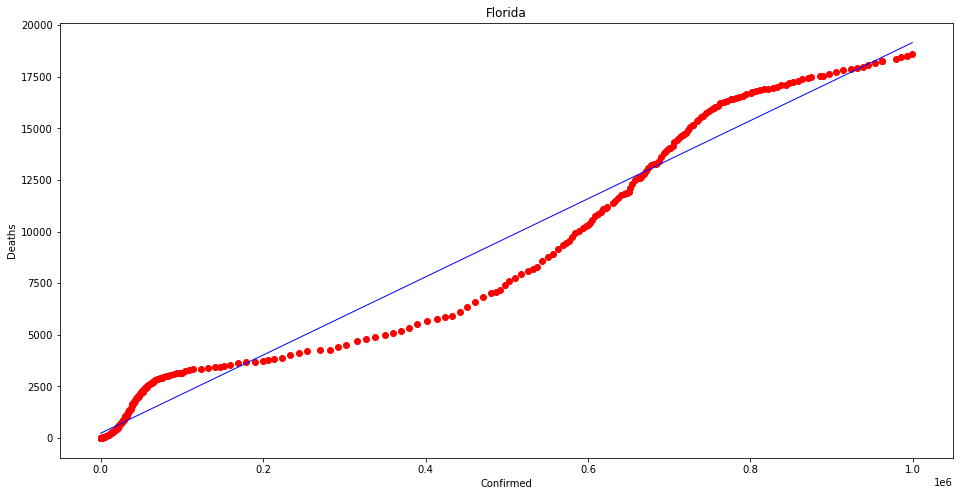

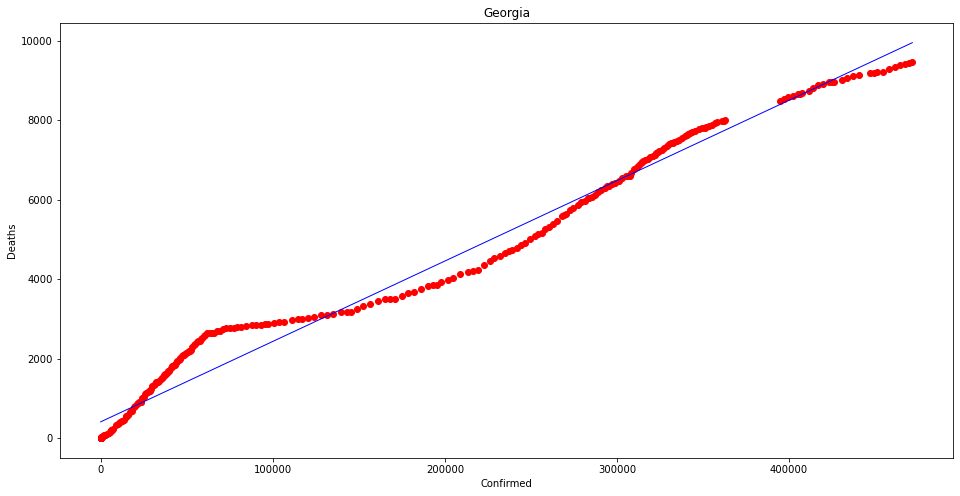

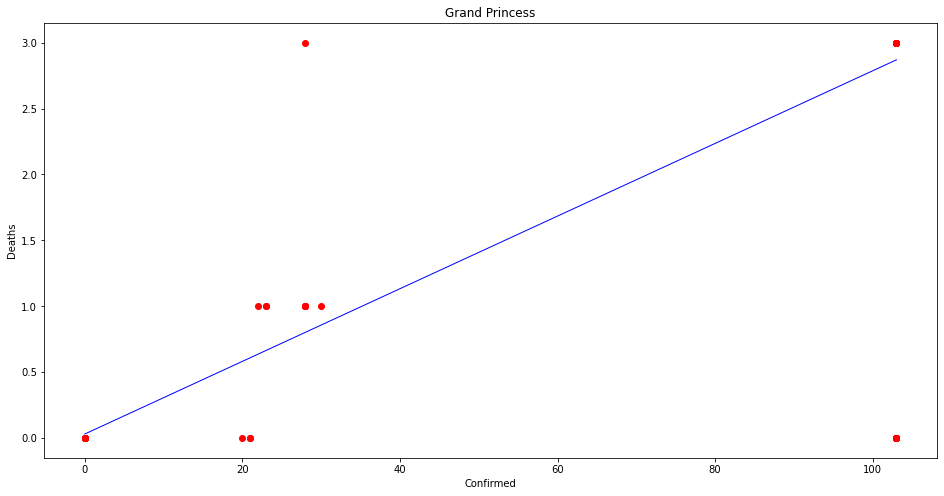

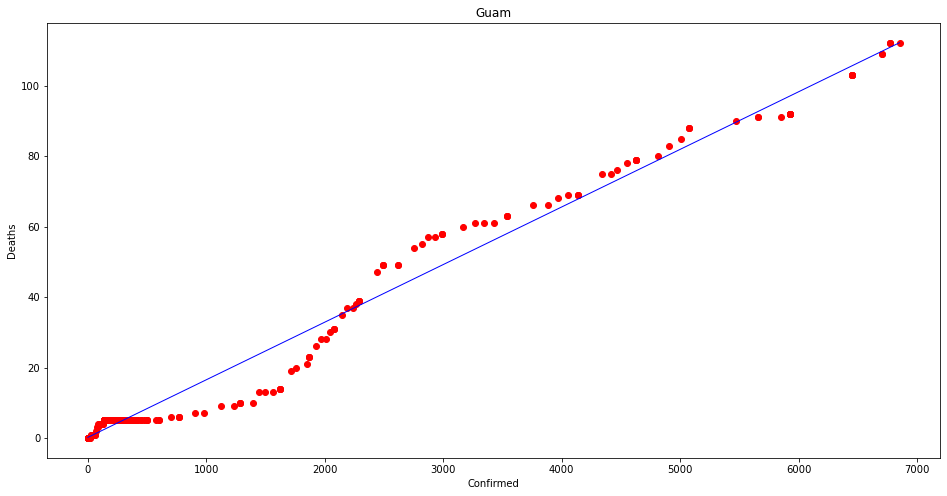

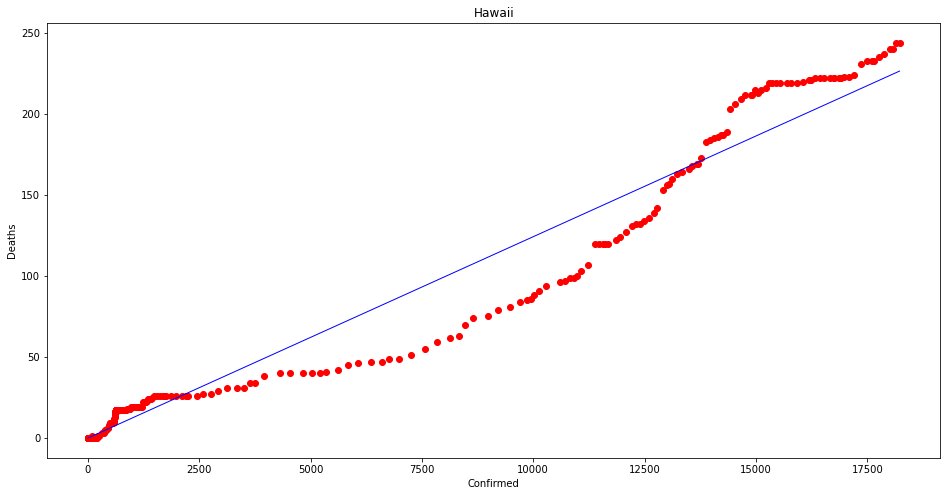

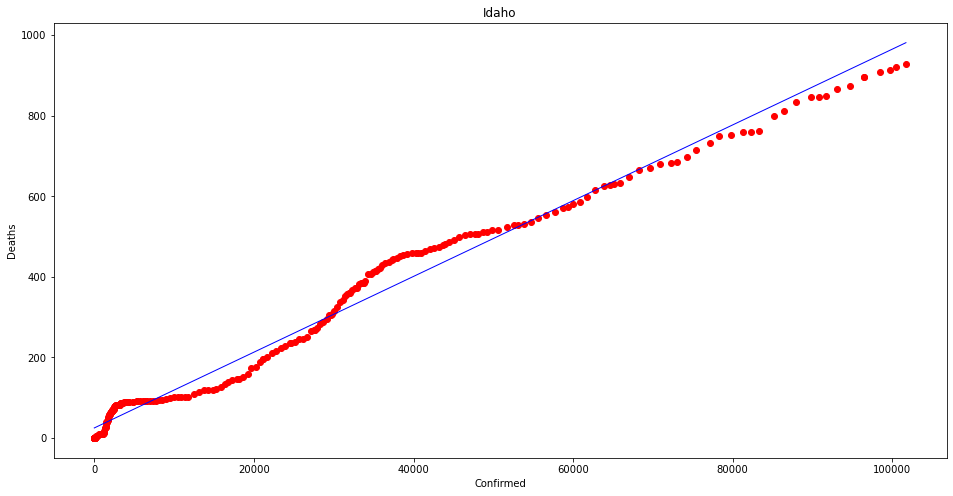

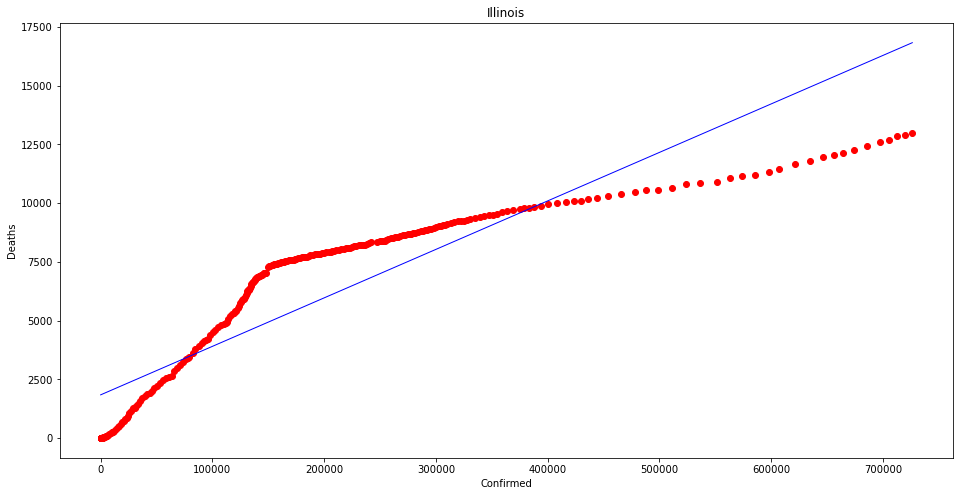

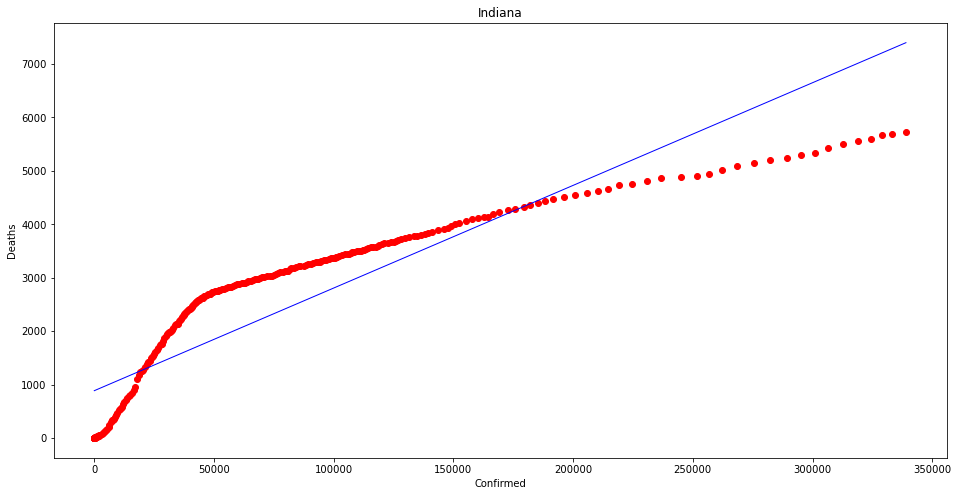

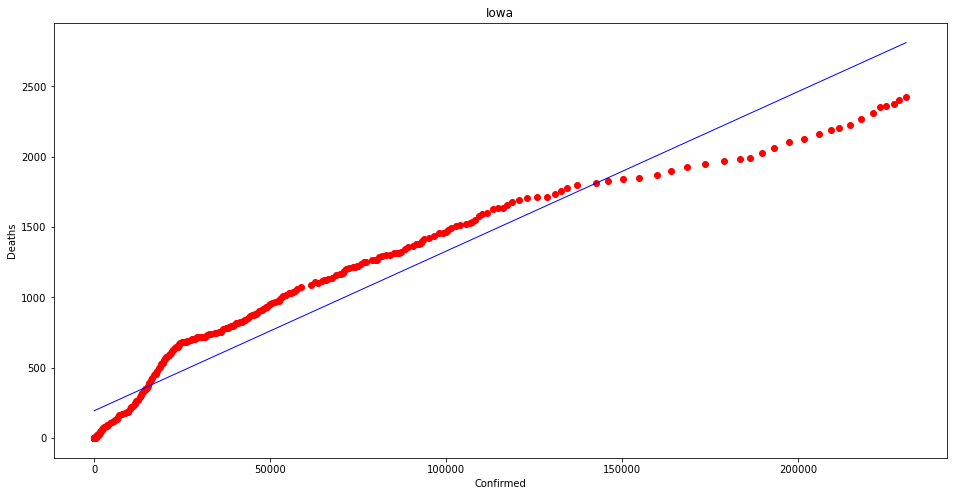

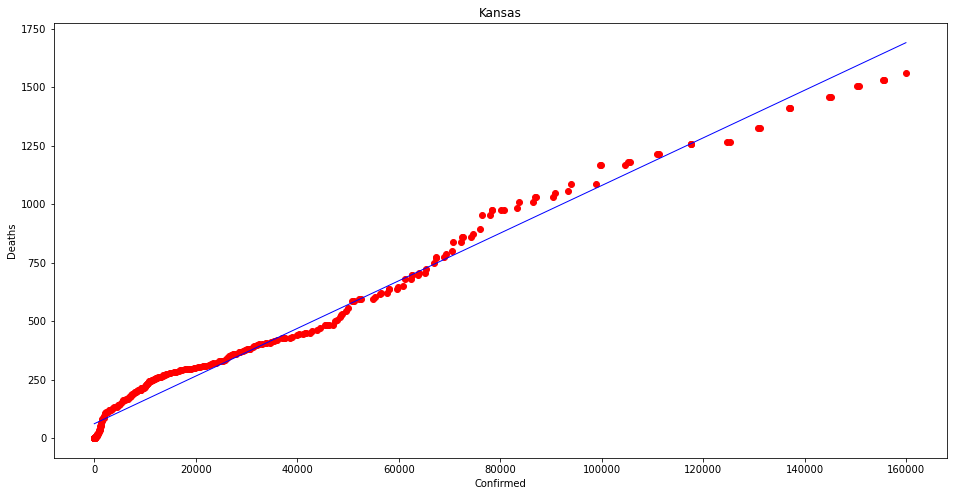

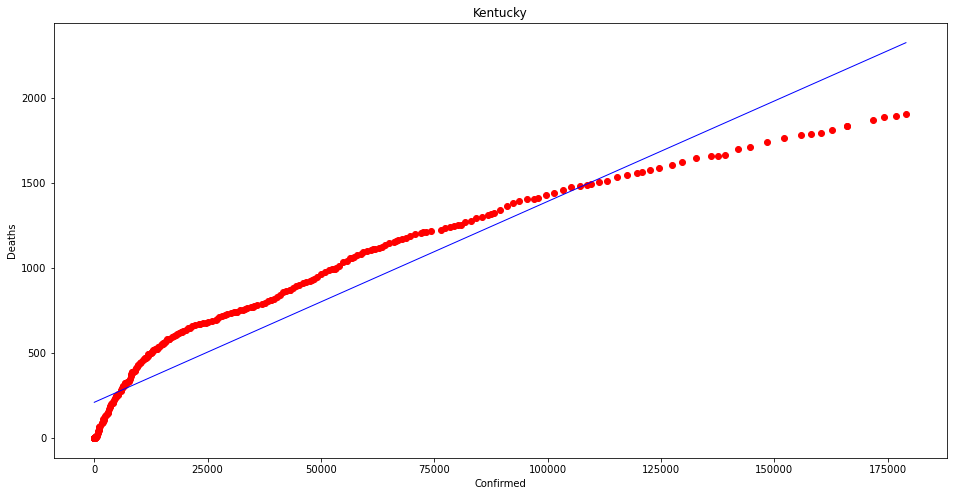

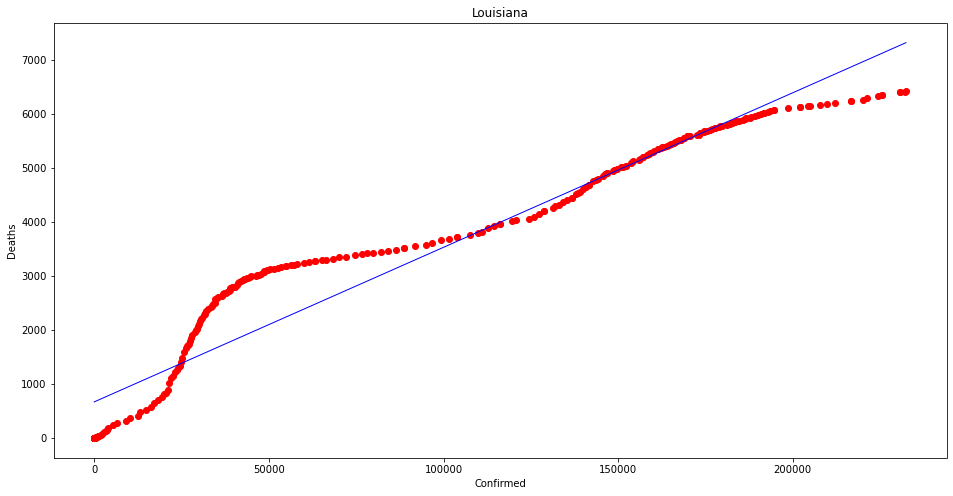

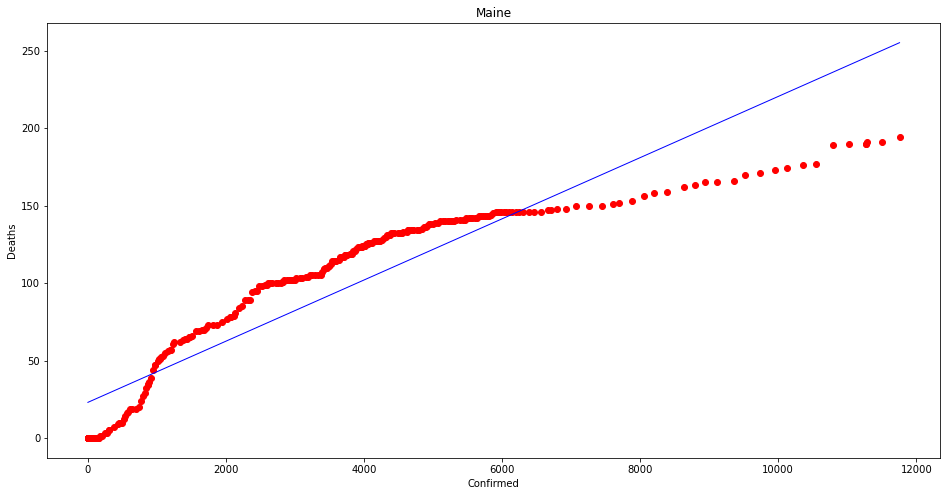

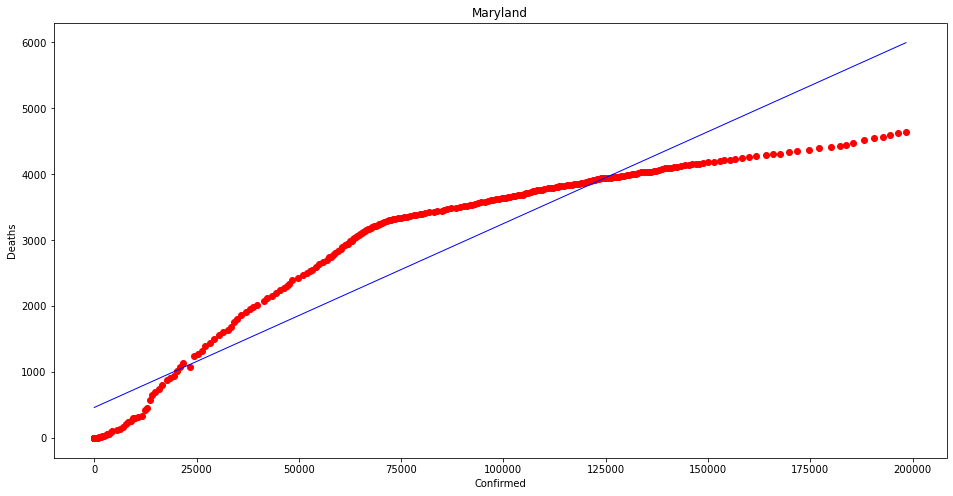

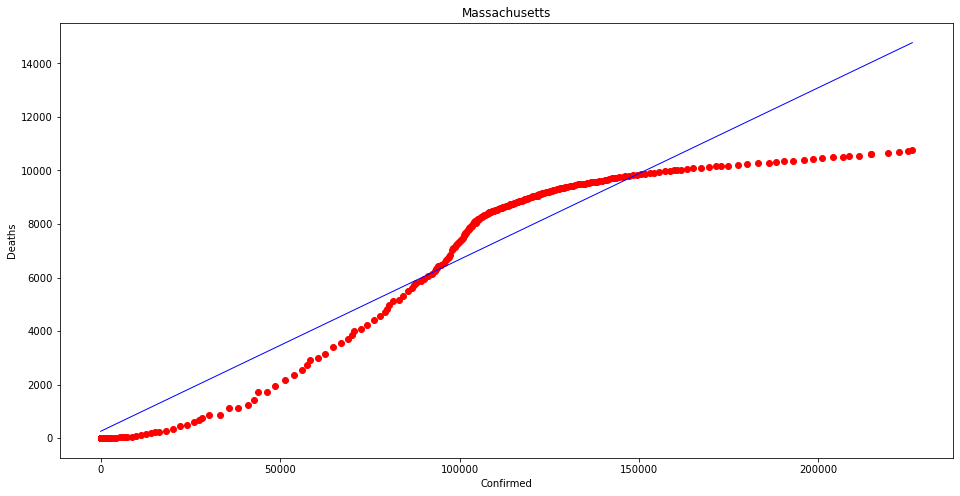

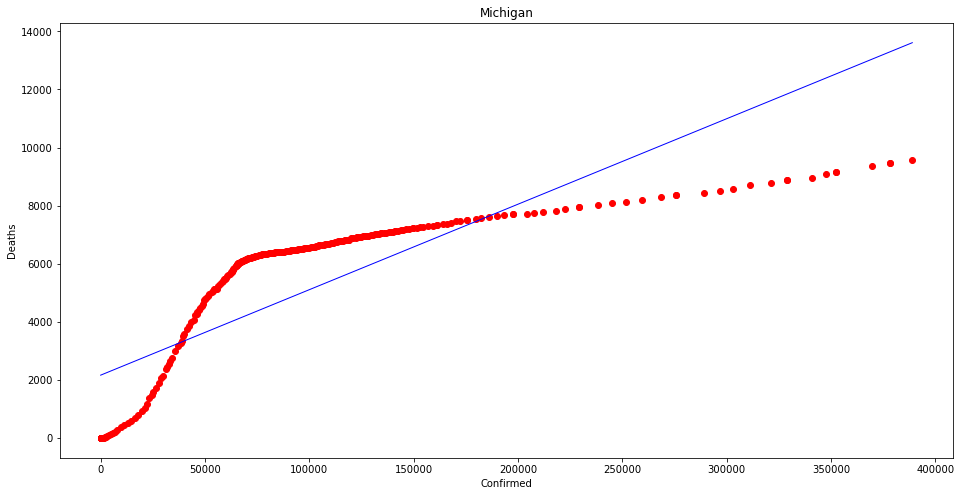

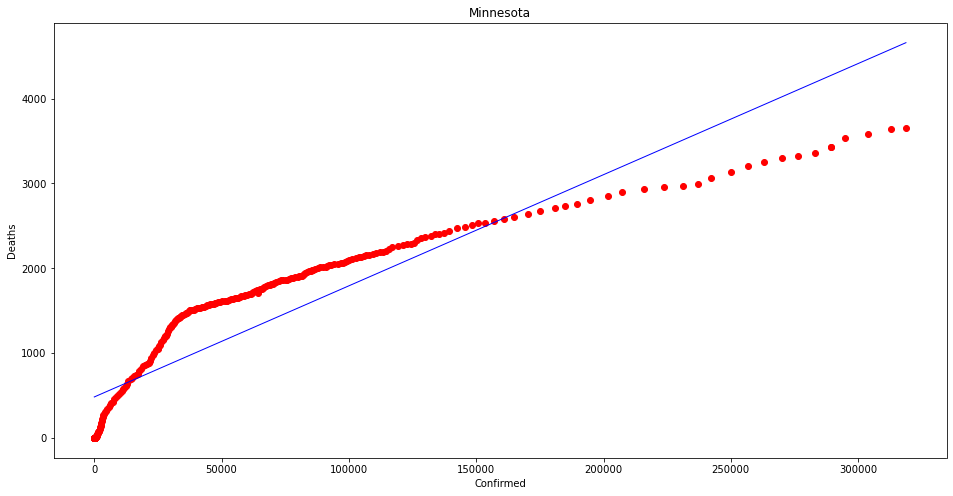

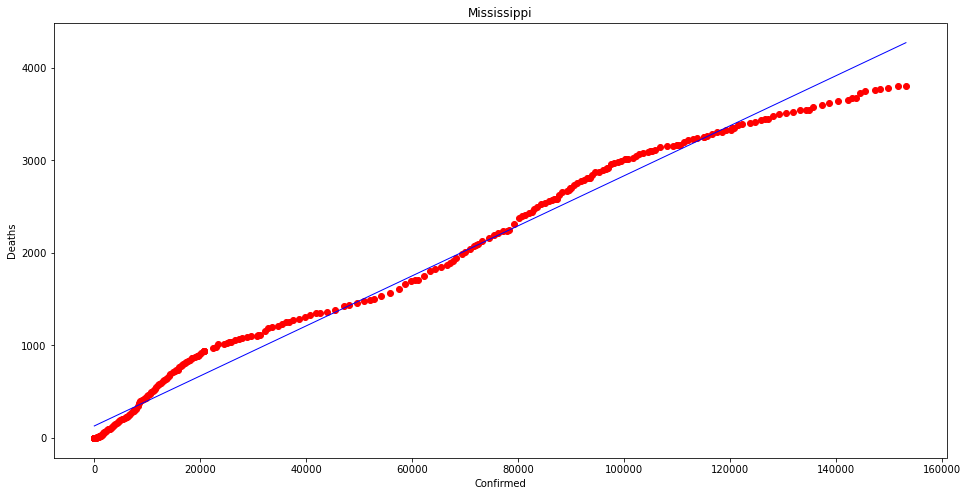

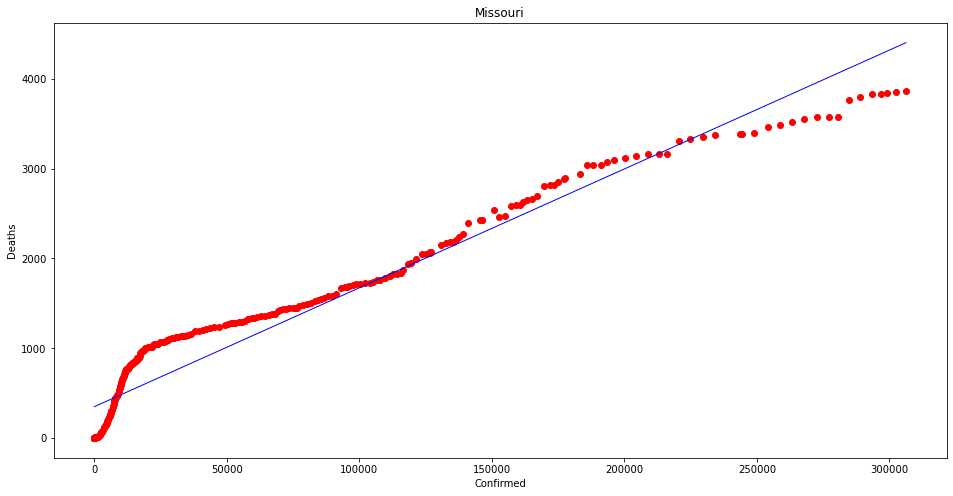

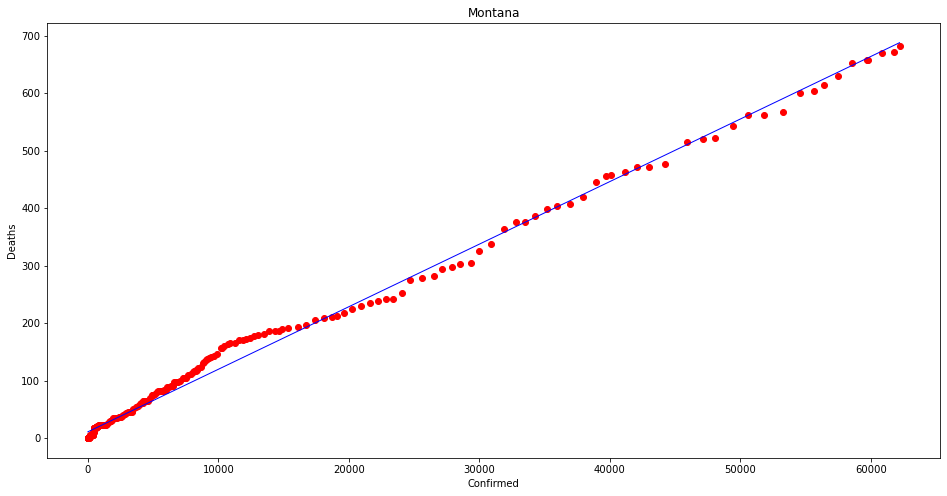

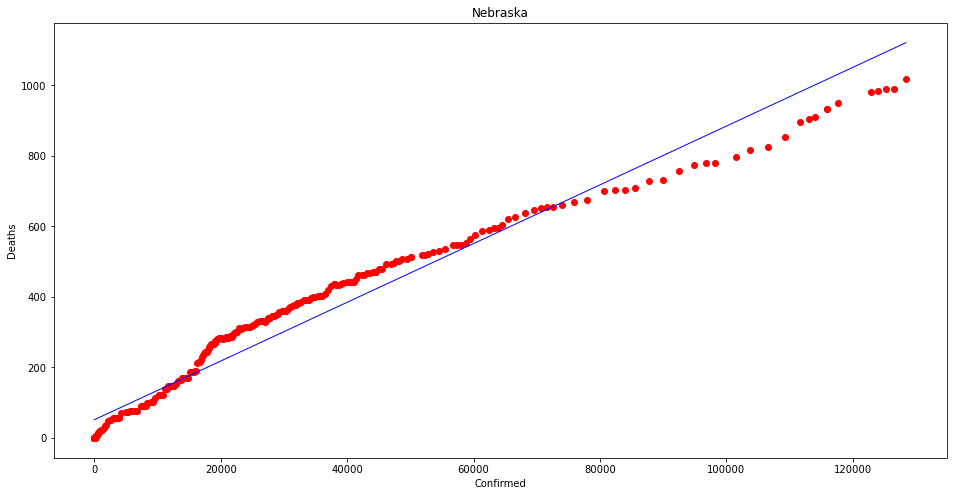

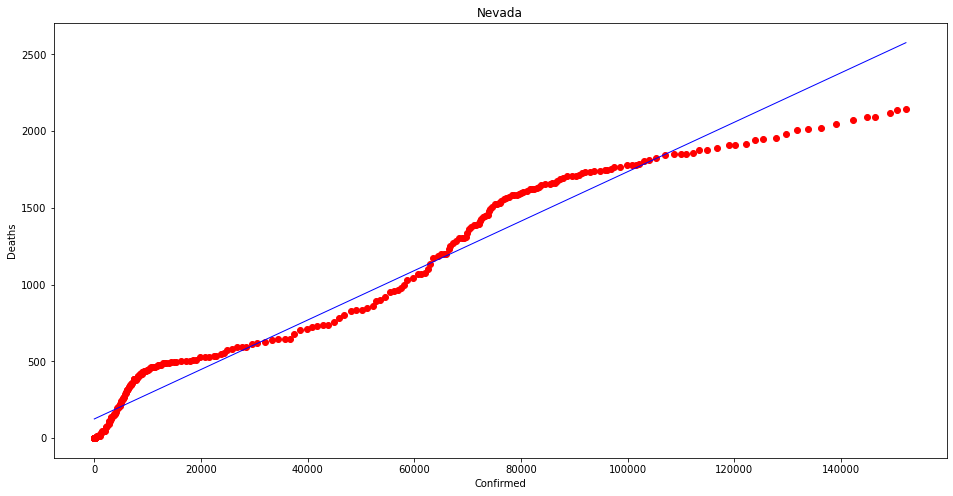

In [ ]:
for s in lists:
    Ill = full_grouped[full_grouped['Province_State'] == s]
    
    base = alt.Chart(Ill).mark_bar().encode(
        x='monthdate(Date):O',
    ).properties(
        width=500
    )

    red = alt.value("#f54242")

    base.encode(y = 'Confirmed').properties(title = 'Total Confirmed') | base.encode(y = 'Deaths', color = red).properties(title = 'Total Deaths')


    Ill = Ill.reset_index()
    Ill['Days'] = Ill.index


    X = Ill['Confirmed'].values.reshape(-1,1)
    y = Ill['Deaths'].values.reshape(-1,1)


    reg = LinearRegression()
    reg.fit(X, y)
    p = reg.predict(X)
    plt.figure(figsize=(16, 8))
    plt.scatter(
        X,
        y,
        c='red'
    )
    plt.plot(
        X,
        p,
        c='blue',
        linewidth=1
    )


#     plt.xticks(np.arange(Ill.shape[0])[::20], Ill.Date[1::20], rotation=35)
    #plt.set_xticklabels(Ill.date)
    plt.title(s)
    plt.xlabel("Confirmed")
    plt.ylabel("Deaths")
    plt.show()


